In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from RegresionL import RegresionLineal

In [3]:
df = pd.read_csv("Data/casas_dev.csv")
df.head(60)

precio   tipo         Área  metros_cubiertos unidades  ambientes  \
0   159001.587058  depto   721.976728        703.066245     sqft          5   
1    42435.625078   casa   229.512155        113.935741       m2          4   
2             NaN  depto    73.856399         72.887849       m2          4   
3   135972.861876  depto   776.709623        747.693158     sqft          5   
4    49758.465224   casa   249.165942        102.023922       m2          5   
5     7256.796507   casa   170.849136         77.355172       m2          6   
6       84.244291     ph   115.819630         89.400354       m2          7   
7   179452.480343  depto   851.461518        830.991007     sqft          2   
8    15591.947673   casa   249.407740        156.759643       m2         10   
9   221054.994134  depto   830.968041        821.480555     sqft          5   
10    4036.981308  depto    80.794153         79.669227       m2          7   
11  138411.417627  depto   834.642827        805.943032     sqft          6   
12    5930.871220   casa   204.230709         83.998543       m2          5   
13  122405.175201  depto   759.418649        747.303208     sqft          8   
14  246670.457339  depto   708.766918        694.838695     sqft          6   
15      94.822001  depto    77.623869         74.044851       m2          6   
16     175.665971     ph   137.816833        116.687955       m2          7   
17   31160.129665   casa   229.093308         94.814414       m2          8   
18  131896.769692  depto   746.573416        712.627116     sqft          7   
19  210766.807009  depto   675.344664        670.410980     sqft          5   
20     204.631489   casa   219.806668        109.071154       m2         10   
21      80.746216  depto    74.347339         72.731793       m2          3   
22  104369.295992  depto   758.995790        757.387901     sqft          6   
23  112013.561479  depto   816.603887        786.072669     sqft          3   
24   20191.665329   casa   252.666479        116.542724       m2          7   
25  288693.092328  depto   749.577733        728.067977     sqft          4   
26  164957.245023  depto   704.158291        673.029847     sqft          2   
27   37335.127573   casa   221.770643        176.977295       m2          9   
28    4036.325493  depto    72.856624         69.945073       m2          4   
29  181813.414757  depto   786.926158        784.279272     sqft          3   
30  164737.935607  depto   730.871304        726.382241     sqft          7   
31  133394.254187  depto   816.096589        804.187769     sqft          9   
32   12951.692749  depto    68.421056         66.489754       m2          8   
33   12457.769680  depto    55.911460         53.986148       m2          8   
34  108966.826986  depto   826.317112        809.399733     sqft          4   
35    1256.674286  depto    84.475269         82.900896       m2          6   
36  157667.019837  depto   695.822303        668.757449     sqft          5   
37   11377.995626   casa   194.611639        131.917500       m2         10   
38       0.000000   casa   228.691782        144.378650       m2          6   
39   12867.286751  depto    74.558707         71.258566       m2          3   
40    3472.295182  depto    78.508875         78.476461       m2          3   
41  237018.403927  depto   886.328717        864.173858     sqft          5   
42   28885.854849   casa   234.491281        172.505538       m2          8   
43       0.000000   casa   232.323738        123.652062       m2         10   
44    1305.757447   casa   215.054255        104.656419       m2          8   
45  265349.555752  depto   657.993370        642.516151     sqft          2   
46  166760.129838  depto   722.274486        711.072769     sqft          4   
47   15518.713336   casa   219.424150        123.544427       m2          8   
48  331568.378153     ph  1251.454065        927.209769     sqft          7   
49            NaN   casa   274.320286        170.185879      

Elegi 60 datos, porque es la maxima cantidad de filas que pandas me permite representar sin que se corte parte de la tabla y asi no pueda ver su contenido. Origninalmente, mi idea era mostrar el 10% del dataset, pero como despues de 60 pandas te corta la tabla de output, tome este limite.
Habria que cambiar lo siguiente:
- Todas las unidades tendrian que serlas mismas, ya sea que todas se midan en sqft o en m^2.
- Se tendria que saber la cantidad de pisos que tiene el edificio, no deberia ser posible que sea un NaN
- Se tendria que sabe la edad y en caso de que no se tenga registro de cuando se construyo la pileta, deberia eliminarse el dato porque no aporta utilidad a los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   precio            1545 non-null   float64
 1   tipo              1600 non-null   object 
 2   Área              1600 non-null   float64
 3   metros_cubiertos  1600 non-null   float64
 4   unidades          1600 non-null   object 
 5   ambientes         1600 non-null   int64  
 6   pisos             748 non-null    float64
 7   pileta            1600 non-null   bool   
 8   lat               1600 non-null   float64
 9   lon               1600 non-null   float64
 10  edad              1451 non-null   float64
dtypes: bool(1), float64(7), int64(1), object(2)
memory usage: 126.7+ KB


Hay muchos valores NaN, todos estos distribuidos entre precio, pisos y edad; con mayor concentracion en pisos.

In [5]:
df = df.dropna(subset=["precio", "edad"])
df["pisos"] = pd.to_numeric(df["pisos"], errors='coerce').fillna(1).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 1 to 1599
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   precio            1400 non-null   float64
 1   tipo              1400 non-null   object 
 2   Área              1400 non-null   float64
 3   metros_cubiertos  1400 non-null   float64
 4   unidades          1400 non-null   object 
 5   ambientes         1400 non-null   int64  
 6   pisos             1400 non-null   float64
 7   pileta            1400 non-null   bool   
 8   lat               1400 non-null   float64
 9   lon               1400 non-null   float64
 10  edad              1400 non-null   float64
dtypes: bool(1), float64(7), int64(1), object(2)
memory usage: 121.7+ KB


In [6]:
def agregar_ciudad(datos) -> pd.DataFrame:
    """
    Crea una columna 'ciudad' según la unidad de medida.
    sqft -> NYC
    m2   -> BS.AS
    """

    # asigno ciudad
    datos["ciudad"] = np.where(datos["unidades"] == "sqft", "NYC", "BS.AS")
    return datos

df = agregar_ciudad(df)
df.head(60)

precio   tipo         Área  metros_cubiertos unidades  ambientes  \
1    42435.625078   casa   229.512155        113.935741       m2          4   
3   135972.861876  depto   776.709623        747.693158     sqft          5   
4    49758.465224   casa   249.165942        102.023922       m2          5   
5     7256.796507   casa   170.849136         77.355172       m2          6   
6       84.244291     ph   115.819630         89.400354       m2          7   
7   179452.480343  depto   851.461518        830.991007     sqft          2   
8    15591.947673   casa   249.407740        156.759643       m2         10   
9   221054.994134  depto   830.968041        821.480555     sqft          5   
10    4036.981308  depto    80.794153         79.669227       m2          7   
11  138411.417627  depto   834.642827        805.943032     sqft          6   
12    5930.871220   casa   204.230709         83.998543       m2          5   
13  122405.175201  depto   759.418649        747.303208     sqft          8   
14  246670.457339  depto   708.766918        694.838695     sqft          6   
15      94.822001  depto    77.623869         74.044851       m2          6   
17   31160.129665   casa   229.093308         94.814414       m2          8   
18  131896.769692  depto   746.573416        712.627116     sqft          7   
19  210766.807009  depto   675.344664        670.410980     sqft          5   
21      80.746216  depto    74.347339         72.731793       m2          3   
22  104369.295992  depto   758.995790        757.387901     sqft          6   
23  112013.561479  depto   816.603887        786.072669     sqft          3   
24   20191.665329   casa   252.666479        116.542724       m2          7   
25  288693.092328  depto   749.577733        728.067977     sqft          4   
26  164957.245023  depto   704.158291        673.029847     sqft          2   
27   37335.127573   casa   221.770643        176.977295       m2          9   
28    4036.325493  depto    72.856624         69.945073       m2          4   
29  181813.414757  depto   786.926158        784.279272     sqft          3   
30  164737.935607  depto   730.871304        726.382241     sqft          7   
31  133394.254187  depto   816.096589        804.187769     sqft          9   
32   12951.692749  depto    68.421056         66.489754       m2          8   
33   12457.769680  depto    55.911460         53.986148       m2          8   
34  108966.826986  depto   826.317112        809.399733     sqft          4   
36  157667.019837  depto   695.822303        668.757449     sqft          5   
37   11377.995626   casa   194.611639        131.917500       m2         10   
38       0.000000   casa   228.691782        144.378650       m2          6   
39   12867.286751  depto    74.558707         71.258566       m2          3   
40    3472.295182  depto    78.508875         78.476461       m2          3   
41  237018.403927  depto   886.328717        864.173858     sqft          5   
42   28885.854849   casa   234.491281        172.505538       m2          8   
43       0.000000   casa   232.323738        123.652062       m2         10   
44    1305.757447   casa   215.054255        104.656419       m2          8   
45  265349.555752  depto   657.993370        642.516151     sqft          2   
46  166760.129838  depto   722.274486        711.072769     sqft          4   
47   15518.713336   casa   219.424150        123.544427       m2          8   
48  331568.378153     ph  1251.454065        927.209769     sqft          7   
50  213437.591695  depto   678.468815        644.568263     sqft         10   
51  143429.571895  depto   681.637183        669.030070     sqft          8   
52  148477.588551  depto   678.818091        673.804432     sqft          6   
53  137613.423879  depto   701.519858        689.296424     sqft          7   
54  161760.690585  depto   811.665669        785.921345     sqft          5   
55    7366.432257   casa   200.991803        126.021678      

In [7]:
def convertir_a_m2(datos) -> pd.DataFrame:
    """
    Convierte in-place columnas de superficie a m²
    Pisamos los valores originales (no conservamos sqft)
    """
    columnas = ["Área", "metros_cubiertos"]
    
    # factor fila a fila: sqft -> m2; m2 -> 1
    factor = np.where(datos["unidades"] == "sqft", 0.09290304, 1.0)

    # convierto cada columna de área
    for i in columnas:
        datos[i] = pd.to_numeric(datos[i], errors="coerce") * factor

    datos.drop(columns=["unidades"], inplace=True) #la dropeo, no me va a servir si tengo la ciudad

    return datos

df = convertir_a_m2(df)

df.head(60)

precio   tipo        Área  metros_cubiertos  ambientes  pisos  \
1    42435.625078   casa  229.512155        113.935741          4    1.0   
3   135972.861876  depto   72.158685         69.462967          5    1.0   
4    49758.465224   casa  249.165942        102.023922          5    2.0   
5     7256.796507   casa  170.849136         77.355172          6    2.0   
6       84.244291     ph  115.819630         89.400354          7    1.0   
7   179452.480343  depto   79.103363         77.201591          2    1.0   
8    15591.947673   casa  249.407740        156.759643         10    3.0   
9   221054.994134  depto   77.199457         76.318041          5    1.0   
10    4036.981308  depto   80.794153         79.669227          7    1.0   
11  138411.417627  depto   77.540856         74.874558          6    1.0   
12    5930.871220   casa  204.230709         83.998543          5    2.0   
13  122405.175201  depto   70.552301         69.426740          8    1.0   
14  246670.457339  depto   65.846601         64.552627          6    1.0   
15      94.822001  depto   77.623869         74.044851          6    1.0   
17   31160.129665   casa  229.093308         94.814414          8    3.0   
18  131896.769692  depto   69.358940         66.205225          7    1.0   
19  210766.807009  depto   62.741572         62.283218          5    1.0   
21      80.746216  depto   74.347339         72.731793          3    1.0   
22  104369.295992  depto   70.513016         70.363638          6    1.0   
23  112013.561479  depto   75.864984         73.028541          3    1.0   
24   20191.665329   casa  252.666479        116.542724          7    3.0   
25  288693.092328  depto   69.638050         67.639728          4    1.0   
26  164957.245023  depto   65.418446         62.526519          2    1.0   
27   37335.127573   casa  221.770643        176.977295          9    3.0   
28    4036.325493  depto   72.856624         69.945073          4    1.0   
29  181813.414757  depto   73.107832         72.861929          3    1.0   
30  164737.935607  depto   67.900166         67.483118          7    1.0   
31  133394.254187  depto   75.817854         74.711488          9    1.0   
32   12951.692749  depto   68.421056         66.489754          8    1.0   
33   12457.769680  depto   55.911460         53.986148          8    1.0   
34  108966.826986  depto   76.767372         75.195696          4    1.0   
36  157667.019837  depto   64.644007         62.129600          5    1.0   
37   11377.995626   casa  194.611639        131.917500         10    3.0   
38       0.000000   casa  228.691782        144.378650          6    2.0   
39   12867.286751  depto   74.558707         71.258566          3    1.0   
40    3472.295182  depto   78.508875         78.476461          3    1.0   
41  237018.403927  depto   82.342632         80.284379          5    1.0   
42   28885.854849   casa  234.491281        172.505538          8    3.0   
43       0.000000   casa  232.323738        123.652062         10    3.0   
44    1305.757447   casa  215.054255        104.656419          8    3.0   
45  265349.555752  depto   61.129584         59.691704          2    1.0   
46  166760.129838  depto   67.101495         66.060822          4    1.0   
47   15518.713336   casa  219.424150        123.544427          8    3.0   
48  331568.378153     ph  116.263887         86.140606          7    2.0   
50  213437.591695  depto   63.031815         59.882351         10    1.0   
51  143429.571895  depto   63.326167         62.154927          8    1.0   
52  148477.588551  depto   63.064264         62.598480          6    1.0   
53  137613.423879  depto   65.173327         64.037733          7    1.0   
54  161760.690585  depto   75.406208         73.014482          5    1.0   
55    7366.432257   casa  200.991803        126.021678         10    3.0   
56  169383.644703  depto   63.555527         63.011053          8    1.0   
57   20840.128446   casa  261.286644        115.659762     

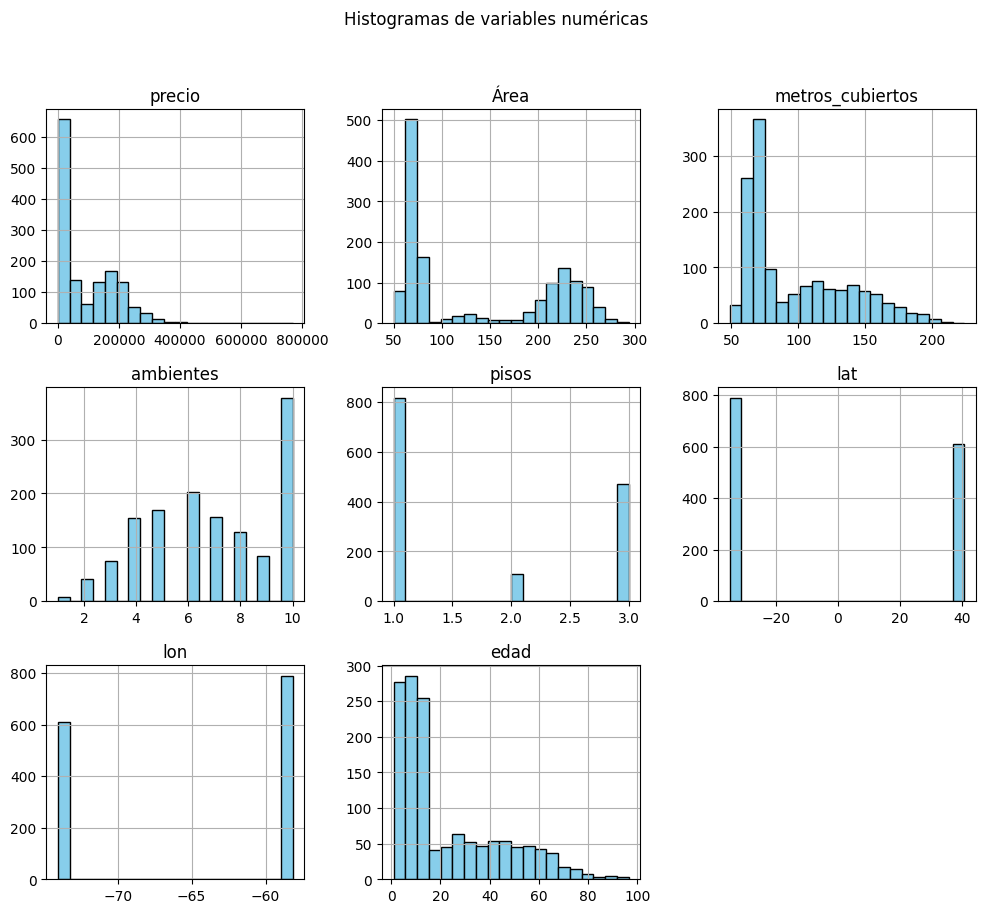

In [8]:
df.hist(figsize=(12,10), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Histogramas de variables numéricas")
plt.show()

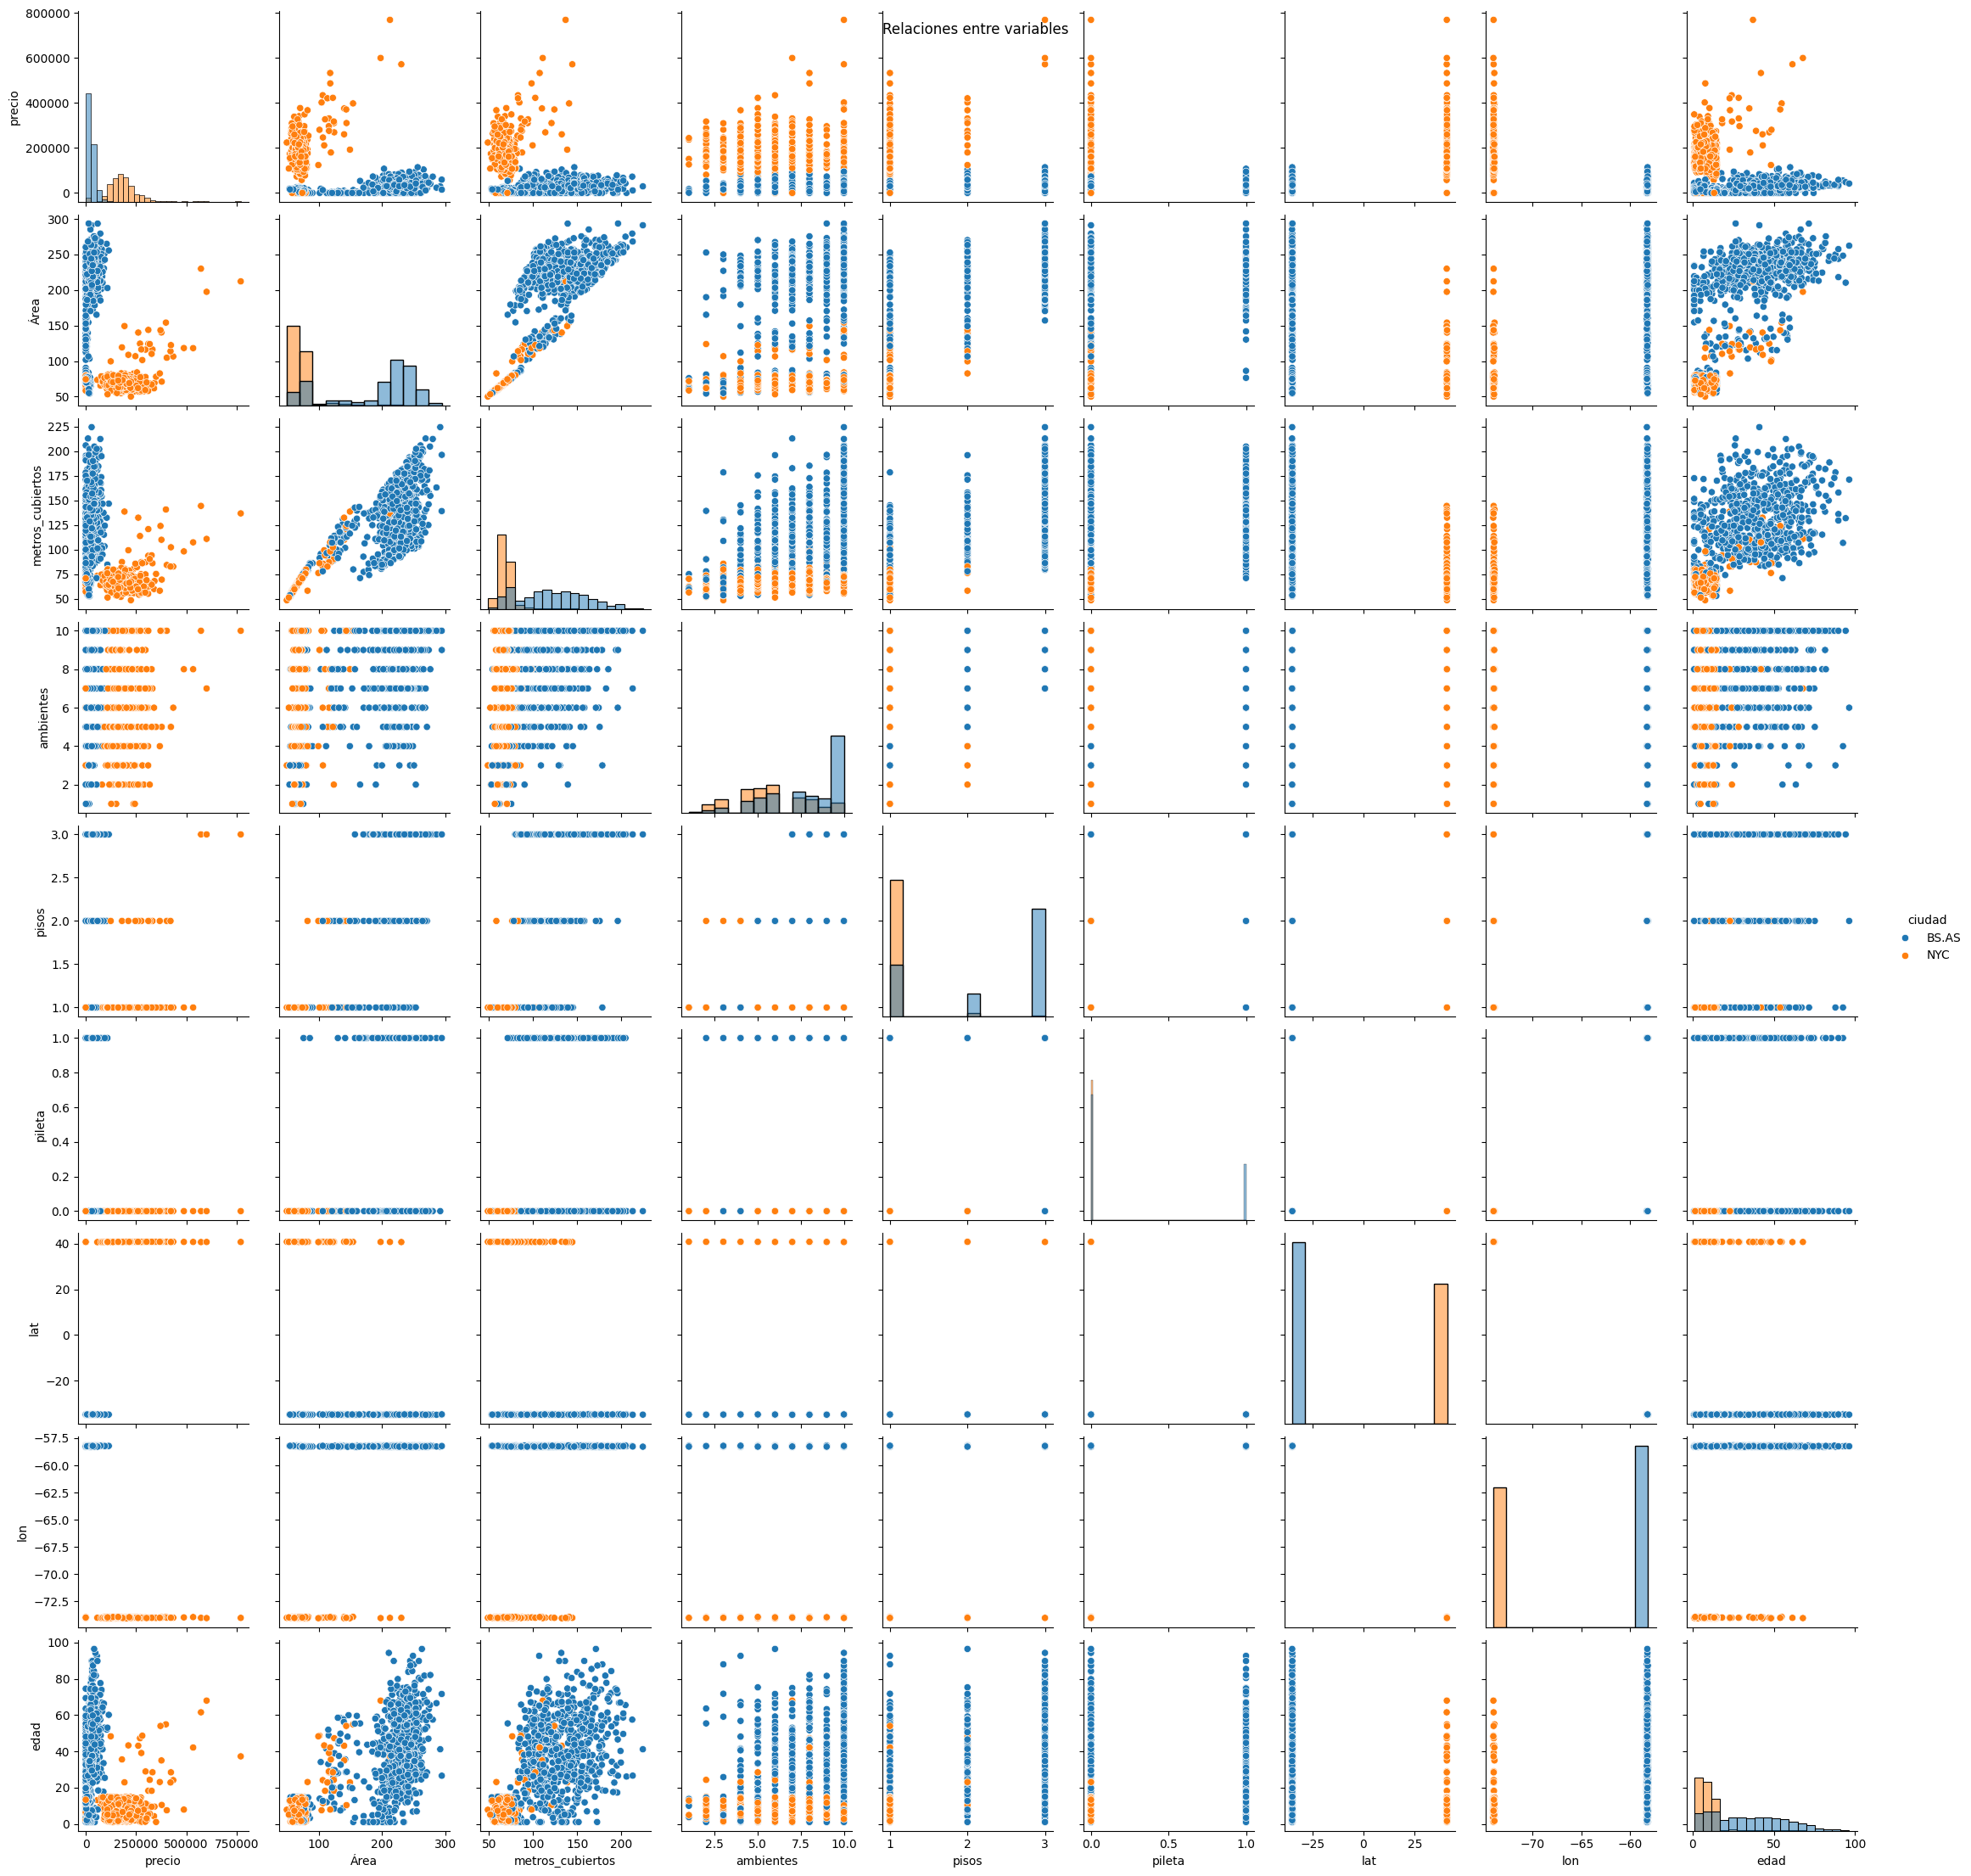

In [9]:
sns.pairplot(df[["precio", "tipo", "Área", "metros_cubiertos", "ciudad", "ambientes", "pisos", "pileta", "lat", "lon", "edad"]], hue="ciudad", diag_kind="hist")
plt.suptitle("Relaciones entre variables")
plt.show()

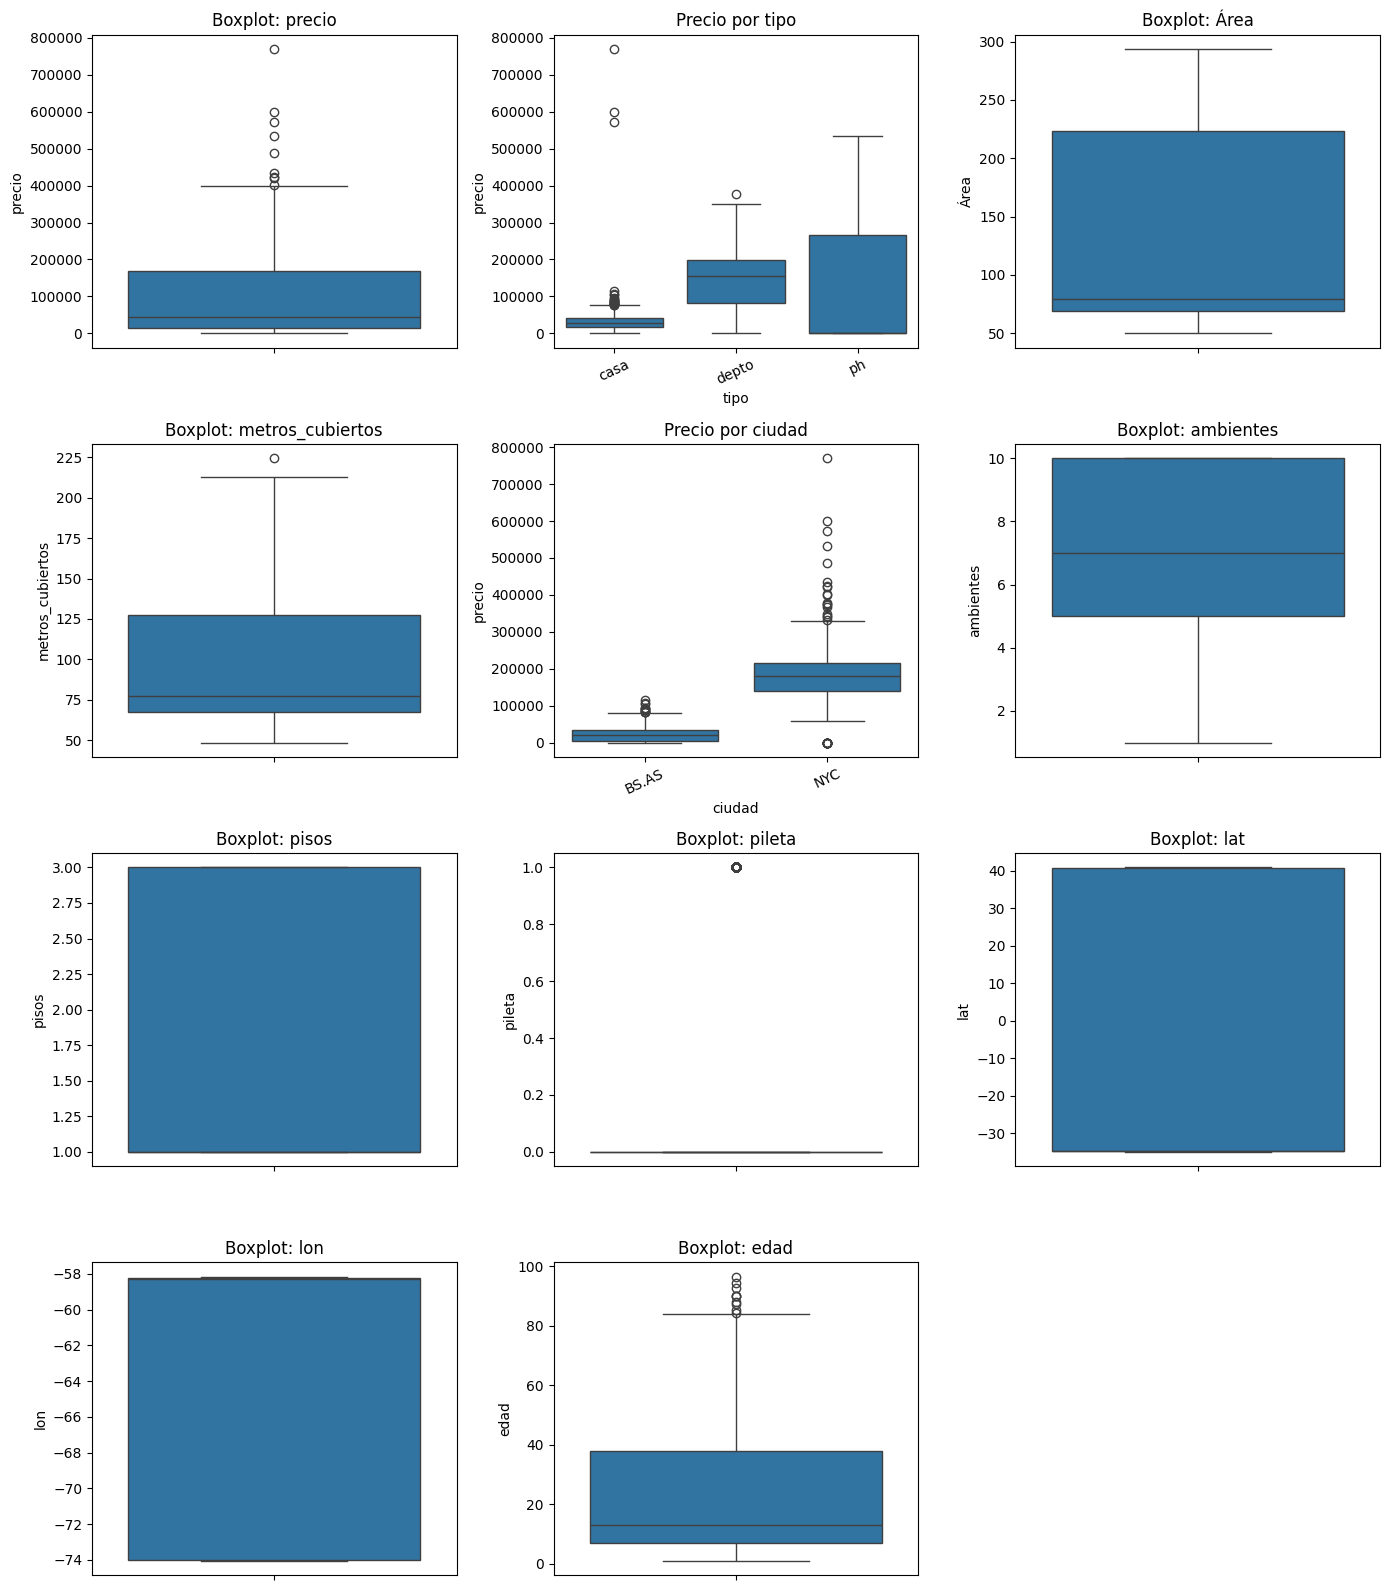

In [10]:

variables = ["precio", "tipo", "Área", "metros_cubiertos", "ciudad",
             "ambientes", "pisos", "pileta", "lat", "lon", "edad"]

# --- BOXPLOTS: una grilla que se ajusta al número de variables ---
n_vars = len(variables)
cols = 3
rows = (n_vars + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows))
axes = axes.ravel()

# Recorro SOLO la cantidad de ejes disponibles
for ax, var in zip(axes, variables):
    if var not in df.columns:
        ax.set_visible(False)
        continue
    # si es numérica -> boxplot univariado
    if pd.api.types.is_numeric_dtype(df[var]):
        sns.boxplot(y=df[var], ax=ax)
        ax.set_title(f"Boxplot: {var}")
    else:
        # si es categórica y existe 'precio', muestro precio por categoría
        if "precio" in df.columns:
            sns.boxplot(x=df[var].astype(str), y=df["precio"], ax=ax)
            ax.set_title(f"Precio por {var}")
            ax.tick_params(axis="x", rotation=25)
        else:
            sns.countplot(x=df[var].astype(str), ax=ax)
            ax.set_title(f"Frecuencias de {var}")
            ax.tick_params(axis="x", rotation=25)

# Si sobran ejes (cuando rows*cols > n_vars), los borro
for j in range(n_vars, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

La presencia de lat y lon son datos sinteticos que me agregan ruido, ya que la presencia individual de cada uno a la hora de hacer el pairplot con cada feature no me dice nada. Para que la lat y la lon tengan sentido, tendrian que ser un par ordenado, pero si se hace esto la comparacion de features no va a ser unidimensional. Rehago los graficos a continuacion

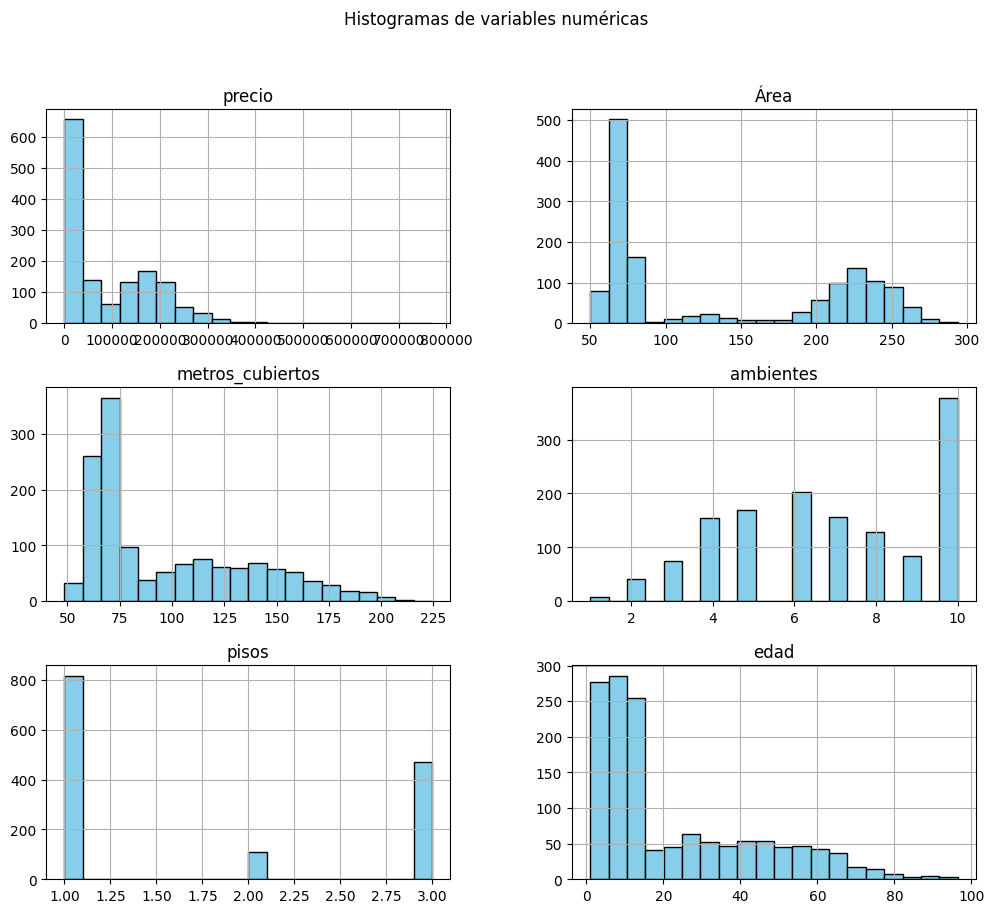

In [11]:
df.drop(columns=["lat", "lon"]).hist(figsize=(12,10), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Histogramas de variables numéricas")
plt.show()

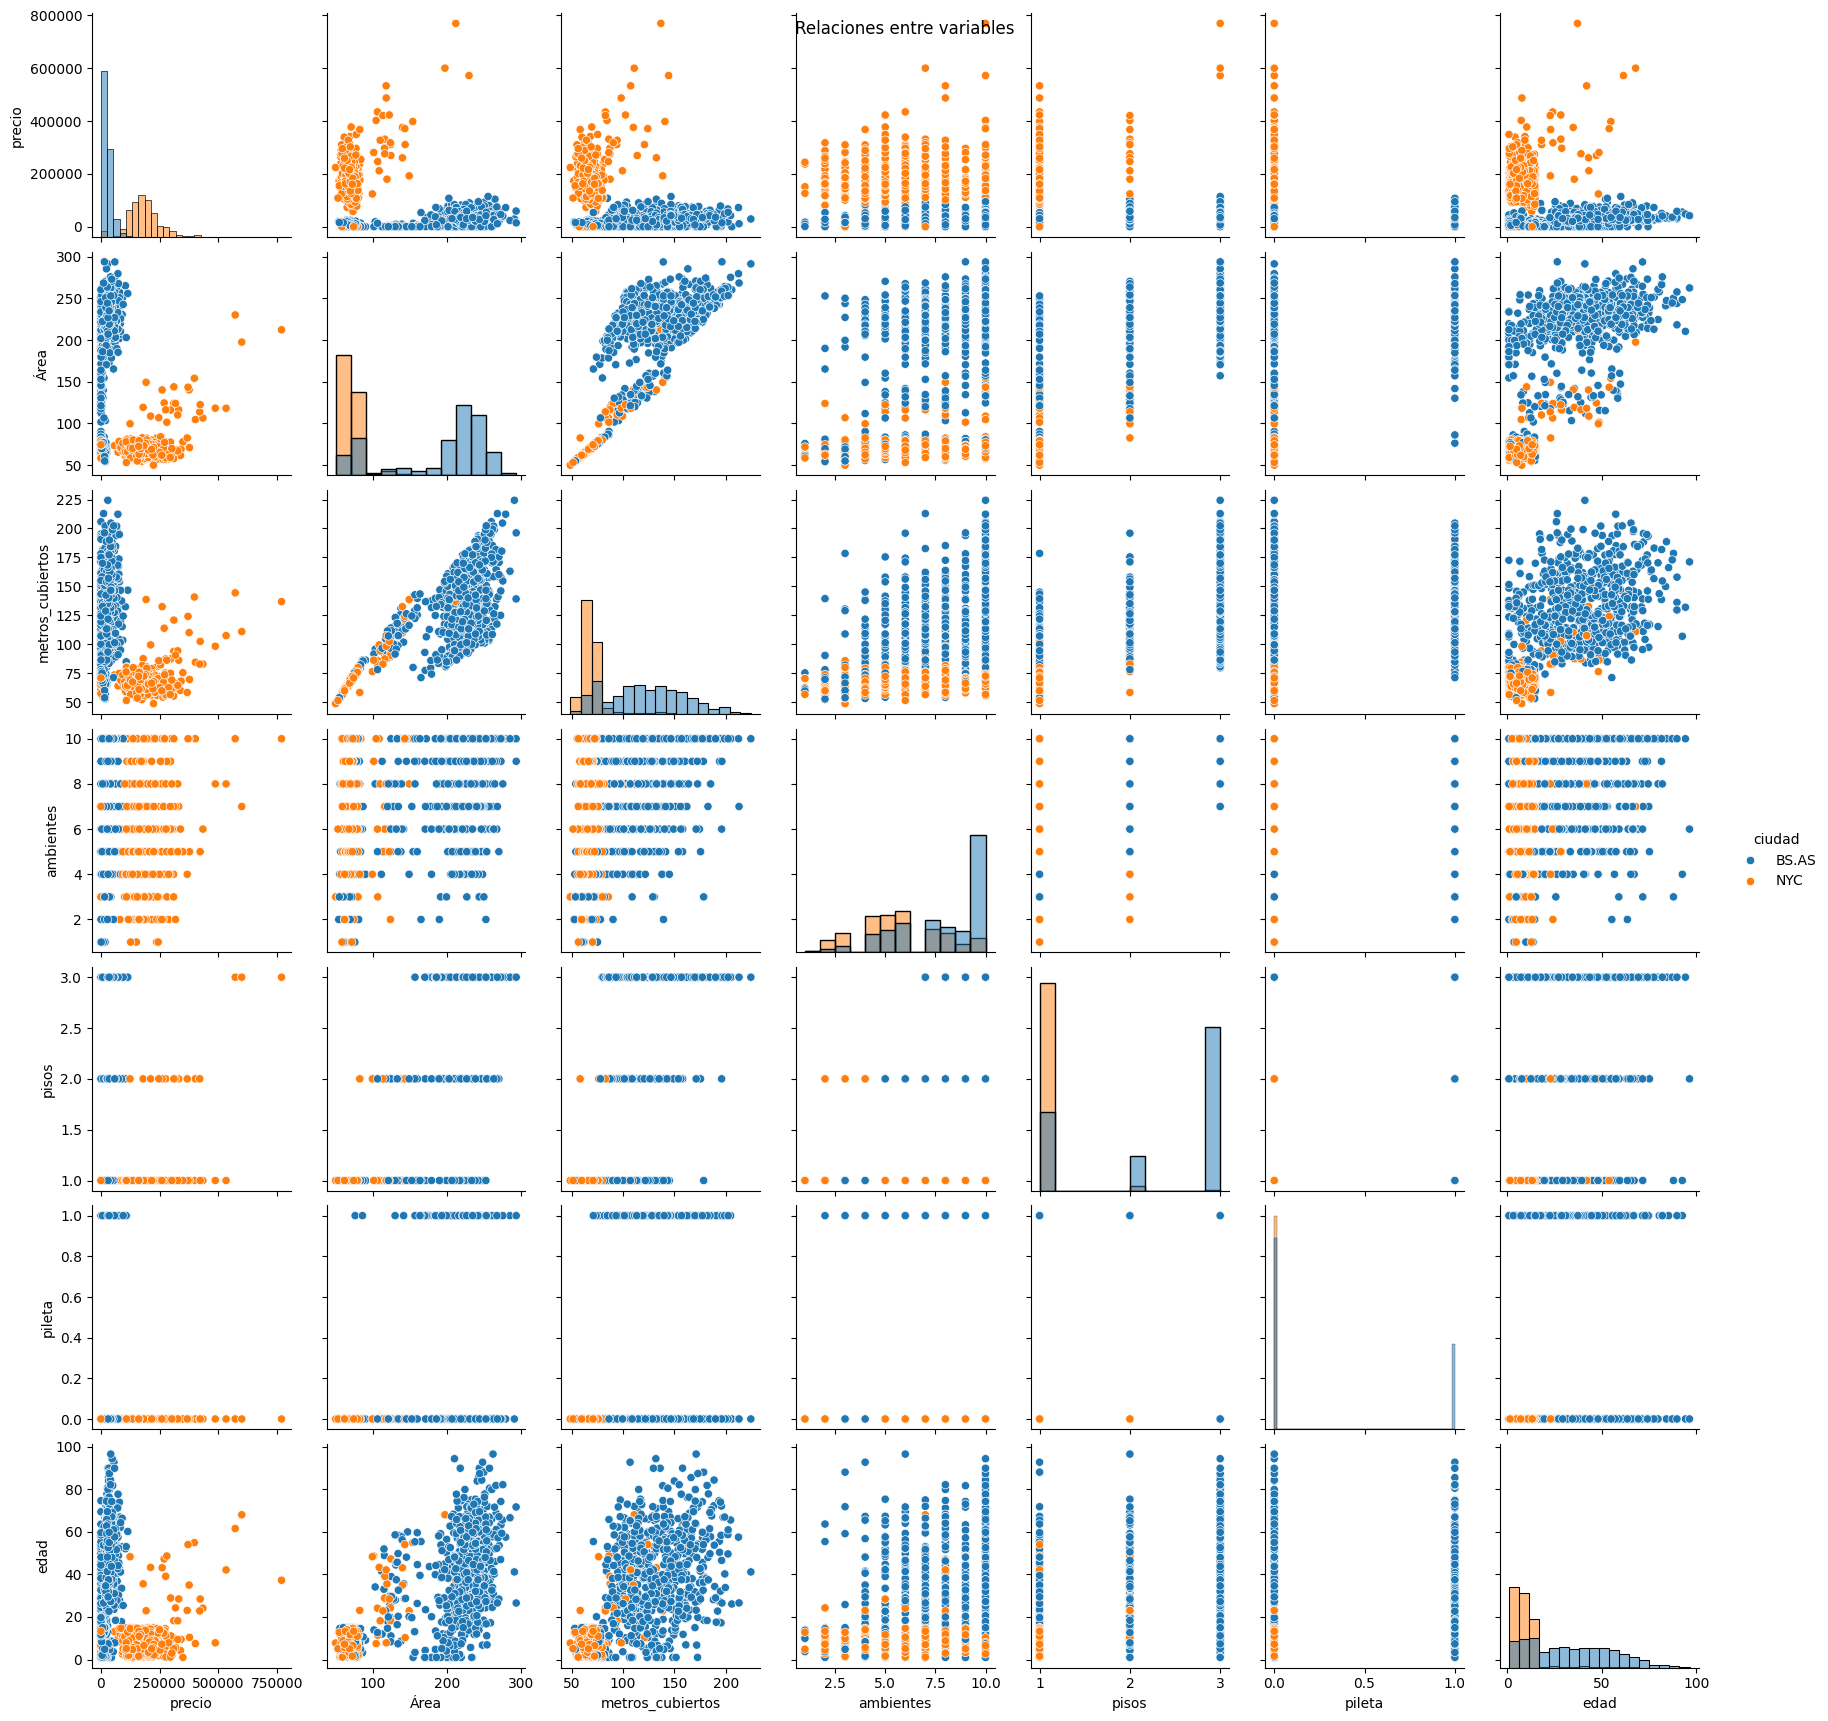

In [12]:
sns.pairplot(df[["precio", "tipo", "Área", "metros_cubiertos", "ciudad", "ambientes", "pisos", "pileta", "edad"]], hue="ciudad", diag_kind="hist")
plt.suptitle("Relaciones entre variables")
plt.show()

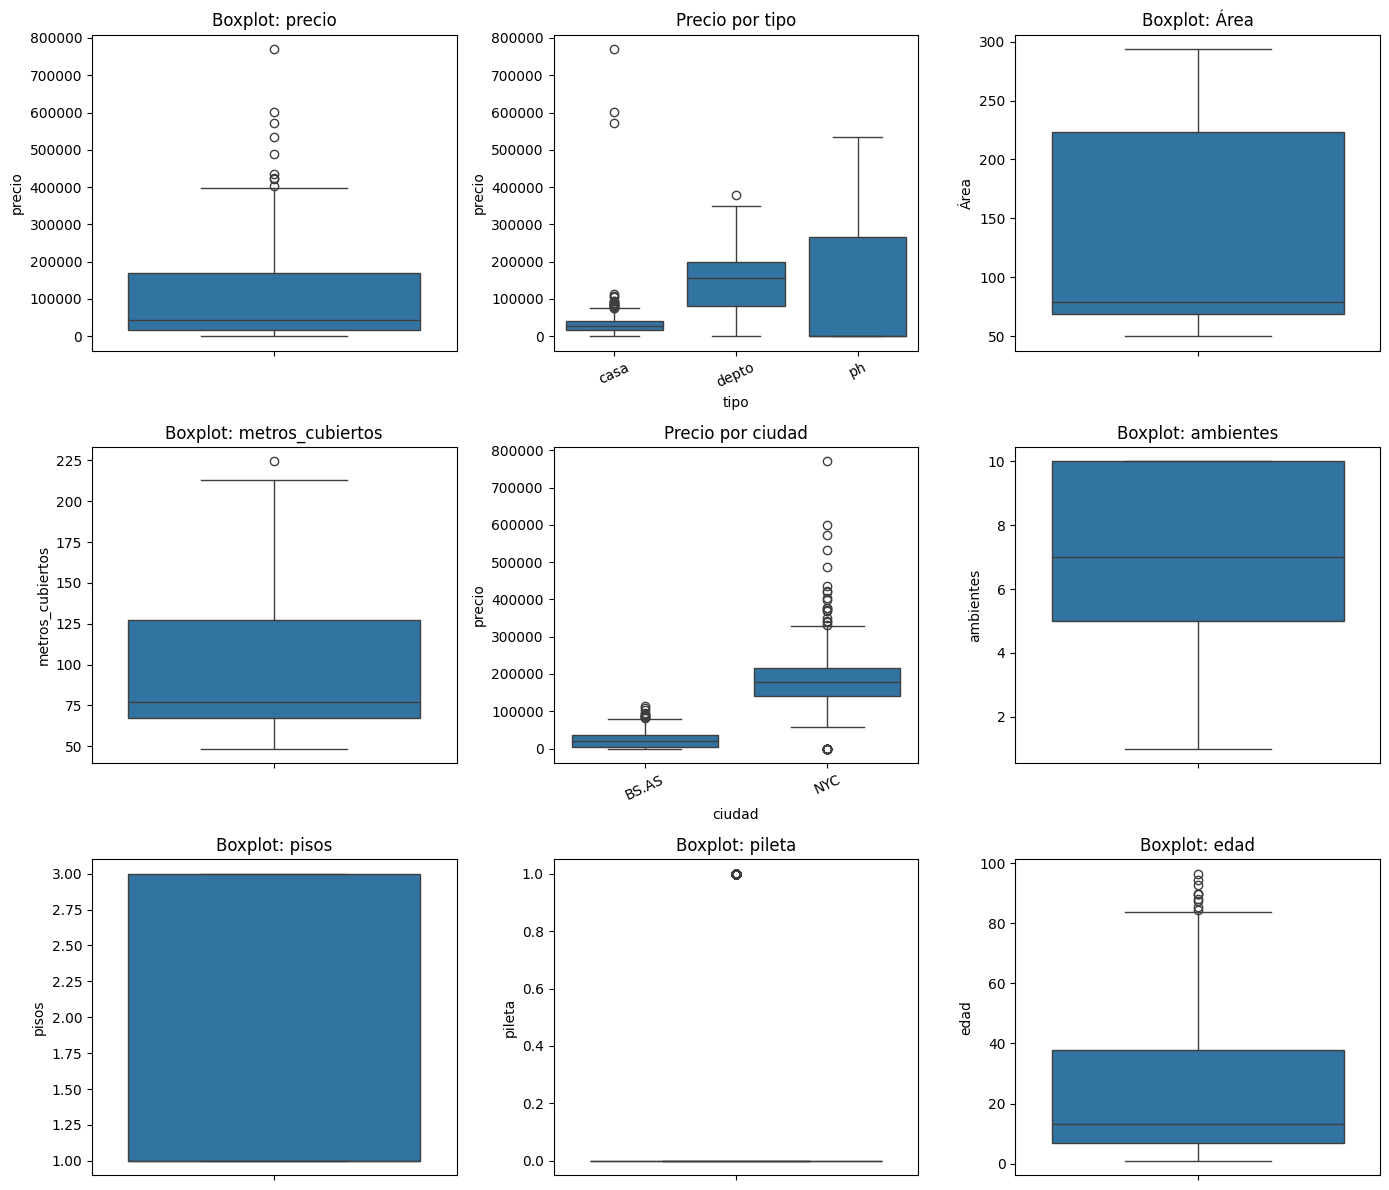

In [13]:
variables = ["precio", "tipo", "Área", "metros_cubiertos", "ciudad",
             "ambientes", "pisos", "pileta", "edad"]

# --- BOXPLOTS: una grilla que se ajusta al número de variables ---
n_vars = len(variables)
cols = 3
rows = (n_vars + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows))
axes = axes.ravel()

# Recorro SOLO la cantidad de ejes disponibles
for ax, var in zip(axes, variables):
    if var not in df.columns:
        ax.set_visible(False)
        continue
    # si es numérica -> boxplot univariado
    if pd.api.types.is_numeric_dtype(df[var]):
        sns.boxplot(y=df[var], ax=ax)
        ax.set_title(f"Boxplot: {var}")
    else:
        # si es categórica y existe 'precio', muestro precio por categoría
        if "precio" in df.columns:
            sns.boxplot(x=df[var].astype(str), y=df["precio"], ax=ax)
            ax.set_title(f"Precio por {var}")
            ax.tick_params(axis="x", rotation=25)
        else:
            sns.countplot(x=df[var].astype(str), ax=ax)
            ax.set_title(f"Frecuencias de {var}")
            ax.tick_params(axis="x", rotation=25)

# Si sobran ejes (cuando rows*cols > n_vars), los borro
for j in range(n_vars, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
import folium
from IPython.display import display

center = [df["lat"].mean(), df["lon"].mean()]
m = folium.Map(location=center, zoom_start=11)

for _, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lon"]], radius=3, color="blue",
                        fill=True, fill_opacity=0.6).add_to(m)

display(m)

In [45]:
def normalize_train (datos):
    num_cols = datos.select_dtypes(include=np.number).columns
    min_vals = datos[num_cols].min()
    max_vals = datos[num_cols].max()
    datos[num_cols] = (datos[num_cols] - min_vals) / (max_vals - min_vals)
    return datos, min_vals, max_vals

def normalize_val (datos, min_vals, max_vals):
    num_cols = datos.select_dtypes(include=np.number).columns
    datos[num_cols] = (datos[num_cols] - min_vals) / (max_vals - min_vals)
    return datos

def deNormalize (y_pred_norm, min_vals, max_vals):
    return y_pred_norm * (max_vals["precio"] - min_vals["precio"]) + min_vals["precio"]

In [16]:
#Separo casas_dev.csv en train y val en 80/20 respectivamente

cut = int(0.8 * len(df))
train_idx = df.index[:cut]
val_idx = df.index[cut:]

train_dev =  df.loc[train_idx].reset_index(drop=True)
val_dev = df.loc[val_idx].reset_index(drop=True)

#Normalizo el dataset

train_dev, min_vals, max_vals = normalize_train(train_dev)
val_dev = normalize_val(val_dev, min_vals, max_vals)


In [17]:
#Modelo 1
y1_train  = pd.to_numeric(train_dev["precio"], errors="coerce")
xM1_train = train_dev[["Área"]].apply(pd.to_numeric, errors="coerce")

M1 = RegresionLineal(xM1_train, y1_train, bias = True).fit_pinv()

print("Modelo M1(Área vs Precio)")

M1.print_coef() 

print("Train")

print("MSE:", M1.mse(), ", R²:", M1.score())

print("Validation")

y1_val  = pd.to_numeric(val_dev["precio"], errors="coerce")
xM1_val = val_dev[["Área"]].apply(pd.to_numeric, errors="coerce")

print("MSE:", M1.mse(xM1_val, y1_val), ", R²:", M1.score(xM1_val, y1_val))

Modelo M1(Área vs Precio)
bias  : 0.19434
Área  : -0.20545
Train
MSE: 0.011013899710318131 , R²: 0.28085461575703297
Validation
MSE: 0.010137340110618337 , R²: 0.3541122863094164


In [18]:
#Modelo 2
y2_train  = pd.to_numeric(train_dev["precio"], errors="coerce")
xM2_train = train_dev[["Área", "pileta"]].apply(pd.to_numeric, errors="coerce")
xM2_train["pileta"] = xM2_train["pileta"].astype(int)
xM2_train = xM2_train.fillna(0).astype(float)

M2 = RegresionLineal(xM2_train, y2_train, bias = True).fit_pinv()

print("Modelo M2(Área y pileta vs Precio)")

M2.print_coef()

print("Train")
print("MSE:", M2.mse(), ", R² :", M2.score())

print("Validation")

y2_val  = pd.to_numeric(val_dev["precio"], errors="coerce")
xM2_val = val_dev[["Área", "pileta"]].apply(pd.to_numeric, errors="coerce")
xM2_val["pileta"] = xM2_val["pileta"].astype(int)
xM2_val = xM2_val.fillna(0).astype(float)

print("MSE:", M2.mse(xM2_val, y2_val), ", R²:", M2.score(xM2_val, y2_val))

Modelo M2(Área y pileta vs Precio)
bias    : 0.19386
Área    : -0.19889
pileta  : -0.01081
Train
MSE: 0.011001680391642862 , R² : 0.28165246818487755
Validation
MSE: 0.010133719866942012 , R²: 0.3543429455243179


In [19]:
#Modelo 3
caracteristicas_3 = ["Área", "metros_cubiertos", "ambientes", "pisos", "edad", "pileta"]
xM3_train = train_dev[caracteristicas_3].apply(pd.to_numeric, errors="coerce")

for i in caracteristicas_3:
    xM3_train[i] = pd.to_numeric(xM3_train[i], errors="coerce")
    if xM3_train[i].dtype == "bool":
        xM3_train[i] = xM3_train[i].astype(int)

y3_train  = pd.to_numeric(train_dev["precio"], errors="coerce")

M3 = RegresionLineal(xM3_train, y3_train, bias = True).fit_pinv()

print("Modelo M3(6 caracteristicas vs Precio)")

M3.print_coef()

print("Train")

print("MSE:", M3.mse(), ", R² :", M3.score())

print("Validation")

y3_val  = pd.to_numeric(val_dev["precio"], errors="coerce")
xM3_val = val_dev[caracteristicas_3].apply(pd.to_numeric, errors="coerce")

for i in caracteristicas_3:
    xM3_val[i] = pd.to_numeric(xM3_val[i], errors="coerce")
    if xM3_val[i].dtype == "bool":
        xM3_val[i] = xM3_val[i].astype(int)

print("MSE:", M3.mse(xM3_val, y3_val), ", R²:", M3.score(xM3_val, y3_val))

Modelo M3(6 caracteristicas vs Precio)
bias              : 0.20550
Área              : -0.24175
metros_cubiertos  : -0.02539
ambientes         : -0.02133
pisos             : 0.02321
edad              : 0.07007
pileta            : -0.01125
Train
MSE: 0.01087770182345963 , R² : 0.2897475677771225
Validation
MSE: 0.010118416857801795 , R²: 0.3553179572609576


In [20]:
def new_features (datos):

    for i in datos:
        if i in ["precio", "tipo", "ciudad", "lat", "lon", "pileta"]:
            continue
        else:
            datos[f"{i}^2"] = datos[i] ** 2

    return datos

dataset_pt_4 = pd.read_csv("Data/casas_dev.csv")

dataset_pt_4 = dataset_pt_4.dropna(subset=["precio", "edad"])
dataset_pt_4["pisos"] = pd.to_numeric(dataset_pt_4["pisos"], errors='coerce').fillna(1).astype(float)

agregar_ciudad(dataset_pt_4)
convertir_a_m2(dataset_pt_4)

dataset_pt_4 = new_features(dataset_pt_4)

dataset_pt_4.head(20)


precio   tipo        Área  metros_cubiertos  ambientes  pisos  \
1    42435.625078   casa  229.512155        113.935741          4    1.0   
3   135972.861876  depto   72.158685         69.462967          5    1.0   
4    49758.465224   casa  249.165942        102.023922          5    2.0   
5     7256.796507   casa  170.849136         77.355172          6    2.0   
6       84.244291     ph  115.819630         89.400354          7    1.0   
7   179452.480343  depto   79.103363         77.201591          2    1.0   
8    15591.947673   casa  249.407740        156.759643         10    3.0   
9   221054.994134  depto   77.199457         76.318041          5    1.0   
10    4036.981308  depto   80.794153         79.669227          7    1.0   
11  138411.417627  depto   77.540856         74.874558          6    1.0   
12    5930.871220   casa  204.230709         83.998543          5    2.0   
13  122405.175201  depto   70.552301         69.426740          8    1.0   
14  246670.457339  depto   65.846601         64.552627          6    1.0   
15      94.822001  depto   77.623869         74.044851          6    1.0   
17   31160.129665   casa  229.093308         94.814414          8    3.0   
18  131896.769692  depto   69.358940         66.205225          7    1.0   
19  210766.807009  depto   62.741572         62.283218          5    1.0   
21      80.746216  depto   74.347339         72.731793          3    1.0   
22  104369.295992  depto   70.513016         70.363638          6    1.0   
23  112013.561479  depto   75.864984         73.028541          3    1.0   

    pileta        lat        lon       edad ciudad        Área^2  \
1     True -34.710794 -58.280446  67.202318  BS.AS  52675.829336   
3    False  40.847320 -74.011712  13.835526    NYC   5206.875847   
4    False -34.777778 -58.255182  63.200110  BS.AS  62083.666576   
5     True -34.693175 -58.240397   4.305892  BS.AS  29189.427146   
6    False -34.787597 -58.272506  48.817601  BS.AS  13414.186691   
7    False  40.817814 -74.035487   6.673449    NYC   6257.342106   
8    False -34.663340 -58.266494  27.380157  BS.AS  62204.220842   
9    False  40.726963 -73.939846  14.963269    NYC   5959.756180   
10   False -34.811706 -58.278978   1.955496  BS.AS   6527.695166   
11   False  40.700531 -74.044438   9.442624    NYC   6012.584344   
12   False -34.777006 -58.299193   1.000000  BS.AS  41710.182307   
13   False  40.694130 -74.048331   8.073171    NYC   4977.627195   
14   False  40.733705 -73.949992   4.505022    NYC   4335.774902   
15   False -34.806706 -58.271845  13.732013  BS.AS   6025.464969   
17    True -34.684875 -58.282674  37.911016  BS.AS  52483.743877   
18   False  40.696336 -73.956863  11.694697    NYC   4810.662552   
19   False  40.726882 -73.948291   7.936295    NYC   3936.504899   
21   False -34.814687 -58.265955  10.566841  BS.AS   5527.526782   
22   False  40.688473 -74.049313  14.340688    NYC   4972.085465   
23   False  40.661223 -73.998075   4.546877    NYC   5755.495735   

    metros_cubiertos^2  ambientes^2  pisos^2       edad^2  
1         12981.353089           16      1.0  4516.151545  
3          4825.103829           25      1.0   191.421782  
4         10408.880742           25      4.0  3994.253907  
5          5983.822691           36      4.0    18.540710  
6          7992.423364           49      1.0  2383.158122  
7          5960.085618            4      1.0    44.534916  
8         24573.585529          100      9.0   749.673019  
9          5824.443354           25      1.0   223.899417  
10         6347.185765           49      1.0     3.823964  
11         5606.199392           36      1.0    89.163147  
12         7055.755157           25      4.0     1.000000  
13         4820.072204           64      1.0    65.176085  
14         4167.041662           36      1.0    20.295225  
15         5482.640009           36      1.0   188.568182  
17         8989.773052           64      9.0  1437.245106  
18         4383.131876   

In [21]:
#Separo casas_dev.csv en train y val en 80/20 respectivamente

cut = int(0.8 * len(dataset_pt_4))
train_idx = dataset_pt_4.index[:cut]
val_idx = dataset_pt_4.index[cut:]

train_dev_pt_4 =  dataset_pt_4.loc[train_idx].reset_index(drop=True)
val_dev_pt_4 = dataset_pt_4.loc[val_idx].reset_index(drop=True)

train_dev_pt_4.drop(columns=["ciudad", "tipo", "lat", "lon"], inplace=True)
val_dev_pt_4.drop(columns=["ciudad", "tipo", "lat", "lon"], inplace=True)
train_dev_pt_4, min_vals_pt_4, max_vals_pt_4 = normalize_train(train_dev_pt_4)
val_dev_pt_4 = normalize_val(val_dev_pt_4, min_vals_pt_4, max_vals_pt_4)

train_dev_pt_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1120 non-null   float64
 1   Área                1120 non-null   float64
 2   metros_cubiertos    1120 non-null   float64
 3   ambientes           1120 non-null   float64
 4   pisos               1120 non-null   float64
 5   pileta              1120 non-null   bool   
 6   edad                1120 non-null   float64
 7   Área^2              1120 non-null   float64
 8   metros_cubiertos^2  1120 non-null   float64
 9   ambientes^2         1120 non-null   float64
 10  pisos^2             1120 non-null   float64
 11  edad^2              1120 non-null   float64
dtypes: bool(1), float64(11)
memory usage: 97.5 KB


In [22]:
val_dev_pt_4.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              280 non-null    float64
 1   Área                280 non-null    float64
 2   metros_cubiertos    280 non-null    float64
 3   ambientes           280 non-null    float64
 4   pisos               280 non-null    float64
 5   pileta              280 non-null    bool   
 6   edad                280 non-null    float64
 7   Área^2              280 non-null    float64
 8   metros_cubiertos^2  280 non-null    float64
 9   ambientes^2         280 non-null    float64
 10  pisos^2             280 non-null    float64
 11  edad^2              280 non-null    float64
dtypes: bool(1), float64(11)
memory usage: 24.5 KB


In [23]:
#Modelo 4
xM4_train = train_dev_pt_4.drop(columns=["precio"]).apply(pd.to_numeric, errors="coerce").fillna(0).astype(float)
y4_train = pd.to_numeric(train_dev_pt_4["precio"], errors="coerce").fillna(0).astype(float)

M4 = RegresionLineal(xM4_train, y4_train, bias=True).fit_pinv()

print("Modelo M4(new features vs Precio)")

M4.print_coef()

print("Train")

print("MSE:", M4.mse(), ", R² :", M4.score())

print("Validation")

xM4_val = val_dev_pt_4.drop(columns=["precio"]).apply(pd.to_numeric, errors="coerce").fillna(0).astype(float)
y4_val = pd.to_numeric(val_dev_pt_4["precio"], errors="coerce").fillna(0).astype(float)

print("MSE:", M4.mse(xM4_val, y4_val), ", R²:", M4.score(xM4_val, y4_val))

Modelo M4(new features vs Precio)
bias                : 0.25407
Área                : -0.47920
metros_cubiertos    : -0.44503
ambientes           : -0.06432
pisos               : 0.13620
pileta              : -0.00765
edad                : 0.03152
Área^2              : 0.31323
metros_cubiertos^2  : 0.41409
ambientes^2         : 0.04605
pisos^2             : -0.10858
edad^2              : 0.04207
Train
MSE: 0.010566435346415057 , R² : 0.310071508989922
Validation
MSE: 0.010015500253977285 , R²: 0.36187515759355615


In [24]:
def up_2_50_features(datos):
    for i in datos:
        if i in ["precio", "tipo", "ciudad", "lat", "lon", "pileta"]:
            continue
        else:
            datos[f"{i}^2"] = datos[i] ** 2
            datos[f"{i}^3"] = datos[i] ** 3
            datos[f"{i}^4"] = datos[i] ** 4
            datos[f"{i}^5"] = datos[i] ** 5
            datos[f"{i}^6"] = datos[i] ** 6
            datos[f"{i}^7"] = datos[i] ** 7
            datos[f"{i}^8"] = datos[i] ** 8
            datos[f"{i}^9"] = datos[i] ** 9
            datos[f"{i}^10"] = datos[i] ** 10

    return datos

dataset_pt_5 = pd.read_csv("Data/casas_dev.csv")

dataset_pt_5 = dataset_pt_5.dropna(subset=["precio", "edad"])
dataset_pt_5["pisos"] = pd.to_numeric(dataset_pt_5["pisos"], errors='coerce').fillna(1).astype(float)

agregar_ciudad(dataset_pt_5)
convertir_a_m2(dataset_pt_5)

dataset_pt_5 = up_2_50_features(dataset_pt_5)

dataset_pt_5.head(20)

precio   tipo        Área  metros_cubiertos  ambientes  pisos  \
1    42435.625078   casa  229.512155        113.935741          4    1.0   
3   135972.861876  depto   72.158685         69.462967          5    1.0   
4    49758.465224   casa  249.165942        102.023922          5    2.0   
5     7256.796507   casa  170.849136         77.355172          6    2.0   
6       84.244291     ph  115.819630         89.400354          7    1.0   
7   179452.480343  depto   79.103363         77.201591          2    1.0   
8    15591.947673   casa  249.407740        156.759643         10    3.0   
9   221054.994134  depto   77.199457         76.318041          5    1.0   
10    4036.981308  depto   80.794153         79.669227          7    1.0   
11  138411.417627  depto   77.540856         74.874558          6    1.0   
12    5930.871220   casa  204.230709         83.998543          5    2.0   
13  122405.175201  depto   70.552301         69.426740          8    1.0   
14  246670.457339  depto   65.846601         64.552627          6    1.0   
15      94.822001  depto   77.623869         74.044851          6    1.0   
17   31160.129665   casa  229.093308         94.814414          8    3.0   
18  131896.769692  depto   69.358940         66.205225          7    1.0   
19  210766.807009  depto   62.741572         62.283218          5    1.0   
21      80.746216  depto   74.347339         72.731793          3    1.0   
22  104369.295992  depto   70.513016         70.363638          6    1.0   
23  112013.561479  depto   75.864984         73.028541          3    1.0   

    pileta        lat        lon       edad  ... pisos^10       edad^2  \
1     True -34.710794 -58.280446  67.202318  ...      1.0  4516.151545   
3    False  40.847320 -74.011712  13.835526  ...      1.0   191.421782   
4    False -34.777778 -58.255182  63.200110  ...   1024.0  3994.253907   
5     True -34.693175 -58.240397   4.305892  ...   1024.0    18.540710   
6    False -34.787597 -58.272506  48.817601  ...      1.0  2383.158122   
7    False  40.817814 -74.035487   6.673449  ...      1.0    44.534916   
8    False -34.663340 -58.266494  27.380157  ...  59049.0   749.673019   
9    False  40.726963 -73.939846  14.963269  ...      1.0   223.899417   
10   False -34.811706 -58.278978   1.955496  ...      1.0     3.823964   
11   False  40.700531 -74.044438   9.442624  ...      1.0    89.163147   
12   False -34.777006 -58.299193   1.000000  ...   1024.0     1.000000   
13   False  40.694130 -74.048331   8.073171  ...      1.0    65.176085   
14   False  40.733705 -73.949992   4.505022  ...      1.0    20.295225   
15   False -34.806706 -58.271845  13.732013  ...      1.0   188.568182   
17    True -34.684875 -58.282674  37.911016  ...  59049.0  1437.245106   
18   False  40.696336 -73.956863  11.694697  ...      1.0   136.765933   
19   False  40.726882 -73.948291   7.936295  ...      1.0    62.984778   
21   False -34.814687 -58.265955  10.566841  ...      1.0   111.658126   
22   False  40.688473 -74.049313  14.340688  ...      1.0   205.655326   
23   False  40.661223 -73.998075   4.546877  ...      1.0    20.674091   

           edad^3        edad^4        edad^5        edad^6        edad^7  \
1   303495.852283  2.039562e+07  1.370633e+09  9.210973e+10  6.189988e+12   
3     2648.421061  3.664230e+04  5.069655e+05  7.014134e+06  9.704424e+07   
4   252437.286421  1.595406e+07  1.008299e+09  6.372458e+10  4.027401e+12   
5       79.834305  3.437579e+02  1.480185e+03  6.373516e+03  2.744368e+04   
6   116340.061204  5.679443e+06  2.772568e+08  1.353501e+10  6.607467e+11   
7      297.201473  1.983359e+03  1.323584e+04  8.832872e+04  5.894571e+05   
8    20526.165271  5.620096e+05  1.538791e+07  4.213235e+08  1.153590e+10   
9     3350.267195  5.013095e+04  7.501229e+05  1.122429e+07  1.679521e+08   
10       7.477746  1.462270e+01  2.859463e+01  5.591669e+01  1.093448e+02   
11     841.934073  7.950067e+03  7.506949e+04  7.088530e+05  6.693432e+06   
12       1.0

In [25]:
#Separo casas_dev.csv en train y val en 80/20 respectivamente

cut = int(0.8 * len(dataset_pt_5))
train_idx = dataset_pt_5.index[:cut]
val_idx = dataset_pt_5.index[cut:]

train_dev_pt_5 =  dataset_pt_5.loc[train_idx].reset_index(drop=True)
val_dev_pt_5 = dataset_pt_5.loc[val_idx].reset_index(drop=True)

train_dev_pt_5.drop(columns=["ciudad", "tipo", "lat", "lon"], inplace=True)
val_dev_pt_5.drop(columns=["ciudad", "tipo", "lat", "lon"], inplace=True)
train_dev_pt_5, min_vals_pt_5, max_vals_pt_5 = normalize_train(train_dev_pt_5)
val_dev_pt_5 = normalize_val(val_dev_pt_5, min_vals_pt_5, max_vals_pt_5)


train_dev_pt_5.head(20)

precio      Área  metros_cubiertos  ambientes  pisos  pileta      edad  \
0   0.055114  0.737192          0.371711   0.333333    0.0    True  0.709774   
1   0.176597  0.091099          0.118654   0.444444    0.0   False  0.137613   
2   0.064625  0.817891          0.303931   0.444444    0.5   False  0.666865   
3   0.009425  0.496322          0.163562   0.555556    0.5    True  0.035443   
4   0.000109  0.270370          0.232101   0.666667    0.0   False  0.512666   
5   0.233066  0.119613          0.162688   0.111111    0.0   False  0.060827   
6   0.020250  0.818884          0.615386   1.000000    1.0   False  0.282829   
7   0.287098  0.111796          0.157660   0.444444    0.0   False  0.149704   
8   0.005243  0.126556          0.176729   0.666667    0.0   False  0.010244   
9   0.179764  0.113198          0.149447   0.555556    0.0   False  0.090516   
10  0.007703  0.633387          0.201364   0.444444    0.5   False  0.000000   
11  0.158975  0.084503          0.118448   0.777778    0.0   False  0.075833   
12  0.320367  0.065181          0.090713   0.555556    0.0   False  0.037578   
13  0.000123  0.113539          0.144726   0.555556    0.0   False  0.136504   
14  0.040470  0.735473          0.262908   0.777778    1.0    True  0.395734   
15  0.171303  0.079603          0.100117   0.666667    0.0   False  0.114661   
16  0.273736  0.052432          0.077800   0.444444    0.0   False  0.074366   
17  0.000105  0.100085          0.137254   0.222222    0.0   False  0.102569   
18  0.135551  0.084341          0.123779   0.555556    0.0   False  0.143029   
19  0.145479  0.106317          0.138943   0.222222    0.0   False  0.038027   

      Área^2    Área^3    Área^4  ...  pisos^10    edad^2    edad^3  \
0   0.599824  0.475506  0.373312  ...  0.000000  0.508103  0.362242   
1   0.032391  0.009972  0.002815  ...  0.000000  0.021429  0.003160   
2   0.712283  0.609808  0.518894  ...  0.017325  0.449373  0.301300   
3   0.319073  0.193231  0.114048  ...  0.017325  0.001974  0.000094   
4   0.130499  0.056784  0.023423  ...  0.000000  0.268071  0.138858   
5   0.044948  0.014712  0.004439  ...  0.000000  0.004899  0.000354   
6   0.713725  0.611600  0.520914  ...  1.000000  0.084250  0.024498   
7   0.041391  0.013325  0.003949  ...  0.000000  0.025084  0.003998   
8   0.048180  0.016000  0.004905  ...  0.000000  0.000318  0.000008   
9   0.042022  0.013569  0.004034  ...  0.000000  0.009921  0.001004   
10  0.468743  0.333579  0.233750  ...  0.017325  0.000000  0.000000   
11  0.029650  0.008997  0.002500  ...  0.000000  0.007222  0.000627   
12  0.021978  0.006387  0.001694  ...  0.000000  0.002171  0.000108   
13  0.042176  0.013629  0.004055  ...  0.000000  0.021108  0.003089   
14  0.597528  0.472880  0.370589  ...  1.000000  0.161625  0.065033   
15  0.027655  0.008301  0.002280  ...  0.000000  0.015278  0.001908   
16  0.017205  0.004856  0.001249  ...  0.000000  0.006975  0.000595   
17  0.036224  0.011373  0.003279  ...  0.000000  0.012453  0.001407   
18  0.029584  0.008974  0.002493  ...  0.000000  0.023030  0.003519   
19  0.038949  0.012393  0.003626  ...  0.000000  0.002214  0.000111   

          edad^4        edad^5        edad^6        edad^7        edad^8  \
0   2.582253e-01  1.840766e-01  1.312195e-01  9.354013e-02  6.668032e-02   
1   4.639089e-04  6.808553e-05  9.992329e-06  1.466486e-06  2.152232e-07   
2   2.019915e-01  1.354149e-01  9.078200e-02  6.086015e-02  4.080058e-02   
3   4.339597e-06  1.986551e-07  9.078283e-09  4.147006e-10  1.894198e-11   
4   7.190639e-02  3.723569e-02  1.928197e-02  9.984888e-03  5.170530e-03   
5   2.509829e-05  1.777445e-06  1.258316e-07  8.907579e-09  6.305595e-10   
6   7.115490e-03  2.066603e-03  6.002171e-04  1.743250e-04  5.063038e-05   
7   6.346863e-04  1.007417e-04  1.599012e-05  2.538011e-06  4.028427e-07   
8   1.724746e-07  3.705970e-09  7.823428e-11  1.637256e-12  3.411482e-14   
9   1.006417e-04  1.008173e-05  1.009830e-06  1.011479e-07  1.013130e-08 

In [26]:
val_dev_pt_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   precio               280 non-null    float64
 1   Área                 280 non-null    float64
 2   metros_cubiertos     280 non-null    float64
 3   ambientes            280 non-null    float64
 4   pisos                280 non-null    float64
 5   pileta               280 non-null    bool   
 6   edad                 280 non-null    float64
 7   Área^2               280 non-null    float64
 8   Área^3               280 non-null    float64
 9   Área^4               280 non-null    float64
 10  Área^5               280 non-null    float64
 11  Área^6               280 non-null    float64
 12  Área^7               280 non-null    float64
 13  Área^8               280 non-null    float64
 14  Área^9               280 non-null    float64
 15  Área^10              280 non-null    flo

In [27]:
#Modelo 5
xM5_train = train_dev_pt_5.drop(columns=["precio"]).apply(pd.to_numeric, errors="coerce").fillna(0).astype(float)
y5_train = pd.to_numeric(train_dev_pt_5["precio"], errors="coerce").fillna(0).astype(float)

M5 = RegresionLineal(xM5_train, y5_train, bias=True).fit_pinv()

print("Modelo M5(51 features vs Precio)")

M5.print_coef()

print("Train")

print("MSE:", M5.mse(), ", R² :", M5.score())

print("Validation")

xM5_val = val_dev_pt_5.drop(columns=["precio"]).apply(pd.to_numeric, errors="coerce").fillna(0).astype(float)
y5_val = pd.to_numeric(val_dev_pt_5["precio"], errors="coerce").fillna(0).astype(float)

print("MSE:", M5.mse(xM5_val, y5_val), ", R²:", M5.score(xM5_val, y5_val))

Modelo M5(51 features vs Precio)
bias                 : 0.06303
Área                 : 3112.09235
metros_cubiertos     : -4809.28283
ambientes            : 69.54667
pisos                : 0.11809
pileta               : -0.00712
edad                 : 1.52511
Área^2               : -34496.43500
Área^3               : 189709.79511
Área^4               : -643404.36711
Área^5               : 1435321.51418
Área^6               : -2146800.82165
Área^7               : 2134127.90198
Área^8               : -1353785.56876
Área^9               : 496215.20243
Área^10              : -79999.05083
metros_cubiertos^2   : 50089.04109
metros_cubiertos^3   : -256543.23843
metros_cubiertos^4   : 815225.97704
metros_cubiertos^5   : -1723094.86110
metros_cubiertos^6   : 2470283.76342
metros_cubiertos^7   : -2378559.65721
metros_cubiertos^8   : 1474634.86379
metros_cubiertos^9   : -532248.11276
metros_cubiertos^10  : 85021.06553
ambientes^2          : -712.98164
ambientes^3          : 3563.33536
ambientes^4 

Se espera que mientras aumente el grado del polinomio, esto aumenta la complejidad del modelo, pero a su vez se le de mas importancia a la feature que este polinomio representa lo que a la larga puede generar que el modelo tenga tendencia overfittear hacia estos datos. Con los resultados conseguidos y con los graficos que siguen, se puede ver que el modelo toma una direccion muy marcada hacia las features con mayor grado por lo que se puede intuir que el modelo tiende a overfittear hacia estas features. Principalmente, se puede ver en los pesos, ya que se puede ver que a medida que aumenta el grado, el coeficiente que acompaña se vuelve progresivamente mas grande, es decir que le da mayor peso, a medida que crece el grado del polinomio.

In [28]:
def _to_1d(a):
    return (a.to_numpy().reshape(-1) if isinstance(a, (pd.Series, pd.DataFrame)) 
            else np.asarray(a).reshape(-1))

def _prepare_X_like_train(model, X):
    # respeta el orden de columnas del entrenamiento si el modelo lo guarda
    if isinstance(X, pd.DataFrame) and hasattr(model, "feature_names") and model.feature_names is not None:
        return X[model.feature_names]
    return X

def plot_model_diagnostics(model, 
                           X_train, y_train, 
                           X_val,   y_val, 
                           model_name="Modelo",
                           univariate_feature: str | None = None,
                           top_k: int = 20):
    """
    Crea gráficos SEPARADOS para un modelo:
      1) Real vs Predicho (train)
      2) Real vs Predicho (val)
      3) (opcional) Scatter + recta si es univariado (dar nombre de columna en univariate_feature)
      4) Barras de coeficientes (ordenados por |peso|, top_k)

    Parámetros:
      - model: tu RegresionLineal ya entrenado (con .predict y .coef)
      - X_train, y_train: datos de entrenamiento
      - X_val,   y_val:   datos de validación
      - model_name: texto para títulos
      - univariate_feature: si tu modelo es 1D, pasá el nombre de esa columna para dibujar la recta
      - top_k: cuántos coeficientes (por |peso|) mostrar como máximo
    """
    # --- Real vs Predicho (train) ---
    Xtr = _prepare_X_like_train(model, X_train)
    ytr_true = _to_1d(y_train)
    ytr_pred = _to_1d(model.predict(Xtr))

    plt.figure(figsize=(6,6))
    plt.scatter(ytr_true, ytr_pred, alpha=0.6)
    lo = float(min(ytr_true.min(), ytr_pred.min()))
    hi = float(max(ytr_true.max(), ytr_pred.max()))
    plt.plot([lo, hi], [lo, hi], linestyle="--")
    plt.xlabel("Real")
    plt.ylabel("Predicho")
    plt.title(f"{model_name} - Train: Real vs Predicho")
    plt.tight_layout()
    plt.show()

    # --- Real vs Predicho (val) ---
    Xva = _prepare_X_like_train(model, X_val)
    yva_true = _to_1d(y_val)
    yva_pred = _to_1d(model.predict(Xva))

    plt.figure(figsize=(6,6))
    plt.scatter(yva_true, yva_pred, alpha=0.6)
    lo = float(min(yva_true.min(), yva_pred.min()))
    hi = float(max(yva_true.max(), yva_pred.max()))
    plt.plot([lo, hi], [lo, hi], linestyle="--")
    plt.xlabel("Real")
    plt.ylabel("Predicho")
    plt.title(f"{model_name} - Val: Real vs Predicho")
    plt.tight_layout()
    plt.show()

    # --- Scatter + recta (solo univariado si lo pedís) ---
    if univariate_feature is not None:
        # Train
        if isinstance(Xtr, pd.DataFrame):
            x_vals = Xtr[univariate_feature].to_numpy().reshape(-1)
        else:
            X_arr = np.asarray(Xtr)
            if X_arr.ndim != 2 or X_arr.shape[1] != 1:
                raise ValueError("Para 'univariate_feature', X debe tener una sola columna.")
            x_vals = X_arr.reshape(-1)

        order = np.argsort(x_vals)
        x_sorted = x_vals[order]
        if isinstance(Xtr, pd.DataFrame):
            X_sorted = Xtr.iloc[order]
        else:
            X_sorted = x_sorted.reshape(-1, 1)
        y_line = _to_1d(model.predict(X_sorted))

        plt.figure(figsize=(8,6))
        plt.scatter(x_vals, ytr_true, alpha=0.5, label="Datos (train)")
        plt.plot(x_sorted, y_line, linewidth=2, label="Ajuste")
        plt.xlabel(univariate_feature)
        plt.ylabel("Objetivo")
        plt.title(f"{model_name} - Train: Ajuste 1D ({univariate_feature})")
        plt.legend()
        plt.tight_layout()
        plt.show()

    # --- Coeficientes (ordenados por |peso|) ---
    coefs = _to_1d(model.coef)
    # nombres de columnas (incluyendo bias si existe)
    if hasattr(model, "colnames_") and model.colnames_ is not None:
        labels = model.colnames_
    else:
        # fallback: bias + x0..x{p-1}
        has_bias = getattr(model, "bias", getattr(model, "add_intercept", True))
        p = len(coefs) - (1 if has_bias else 0)
        labels = (["bias"] if has_bias else []) + [f"x{i}" for i in range(p)]

    # ordenar por |coef|
    order_idx = np.argsort(np.abs(coefs))[::-1]
    if top_k is not None and top_k > 0:
        order_idx = order_idx[:top_k]
    coefs_plot = coefs[order_idx]
    labels_plot = [labels[i] for i in order_idx]

    plt.figure(figsize=(max(8, min(0.35*len(labels_plot)+2, 18)), 5))
    plt.bar(labels_plot, coefs_plot)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Peso del coeficiente")
    plt.title(f"{model_name} - Coeficientes (Top {len(labels_plot)} por |peso|)")
    plt.tight_layout()
    plt.show()

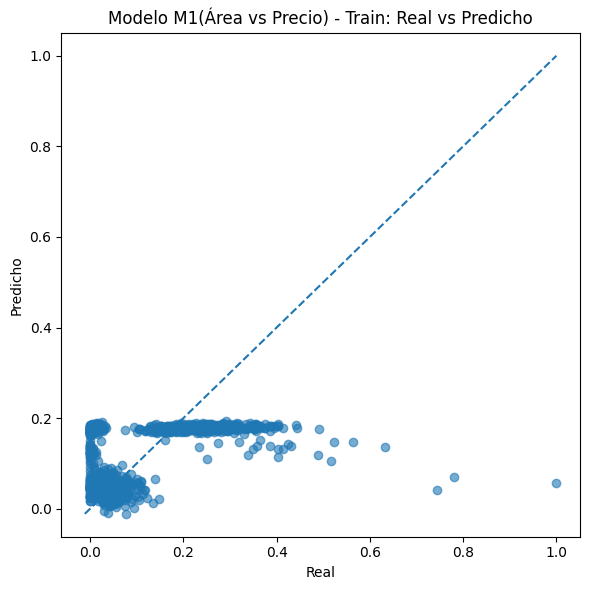

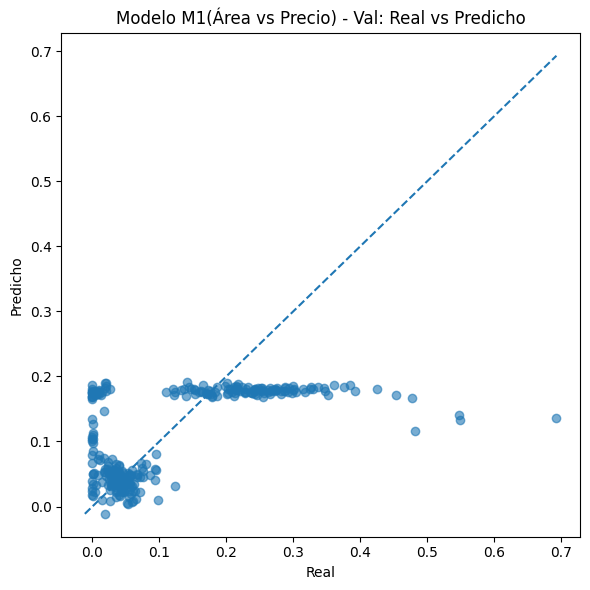

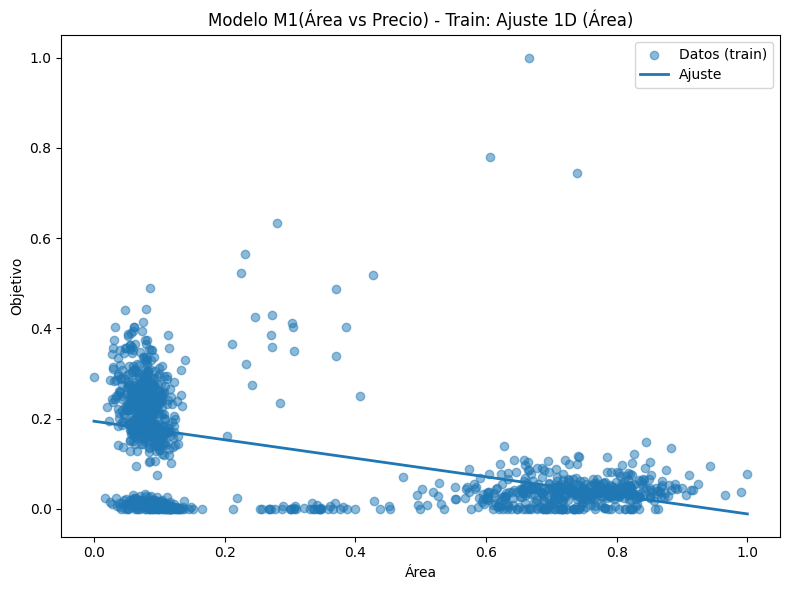

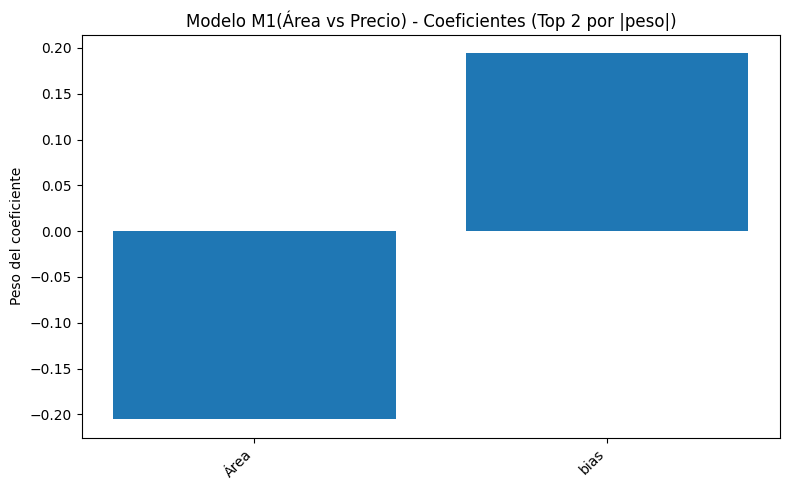

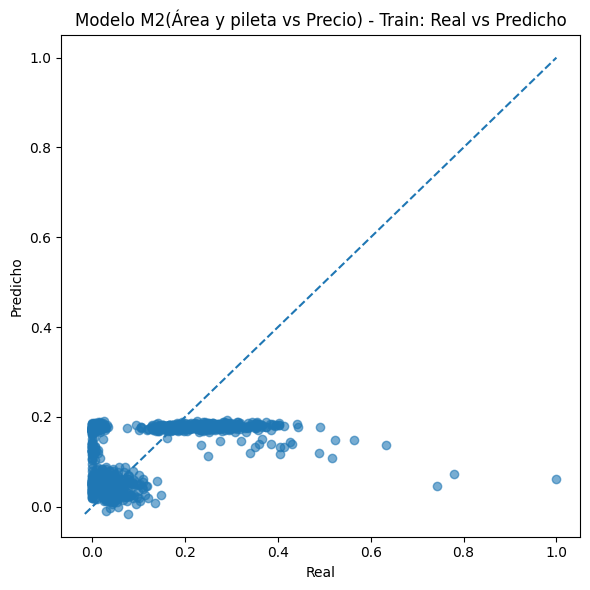

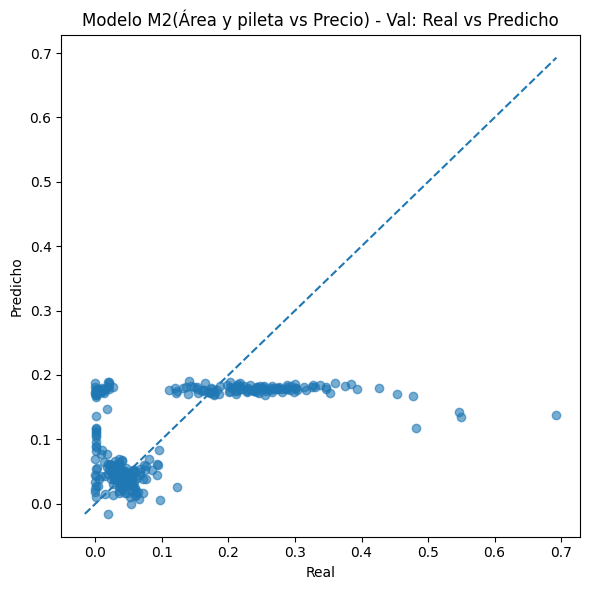

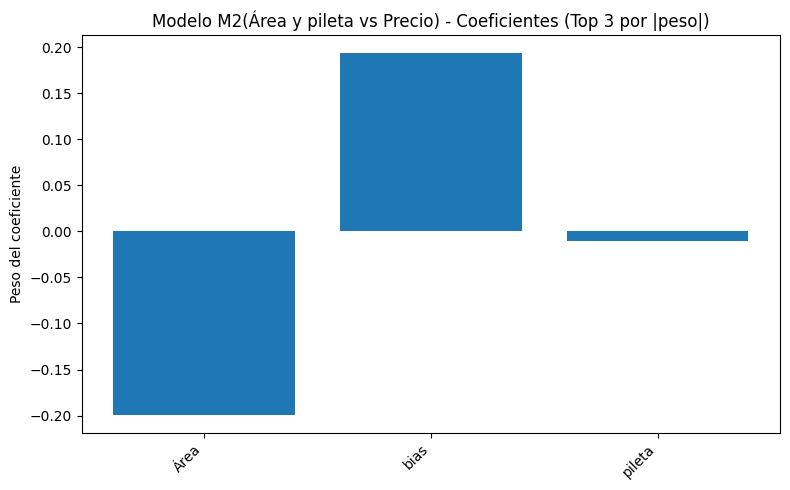

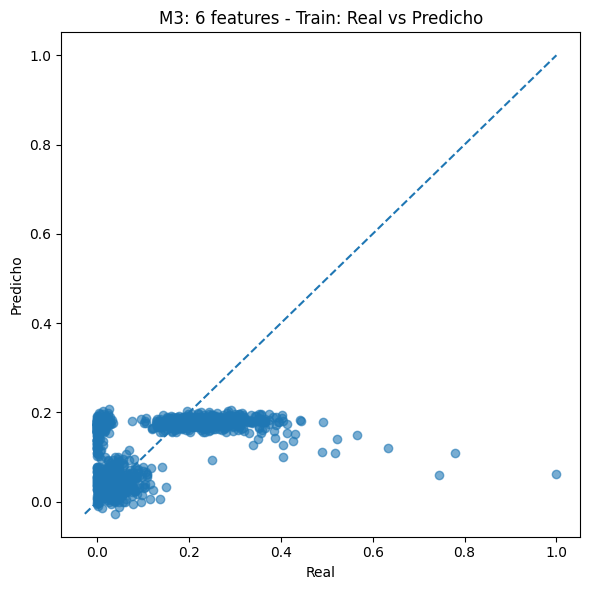

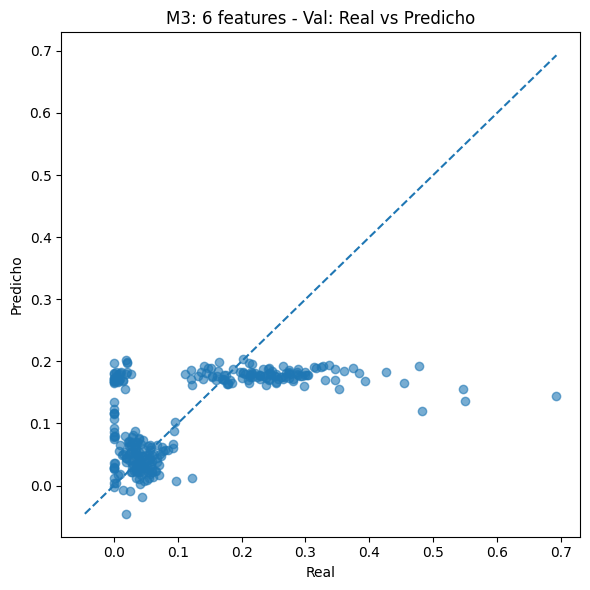

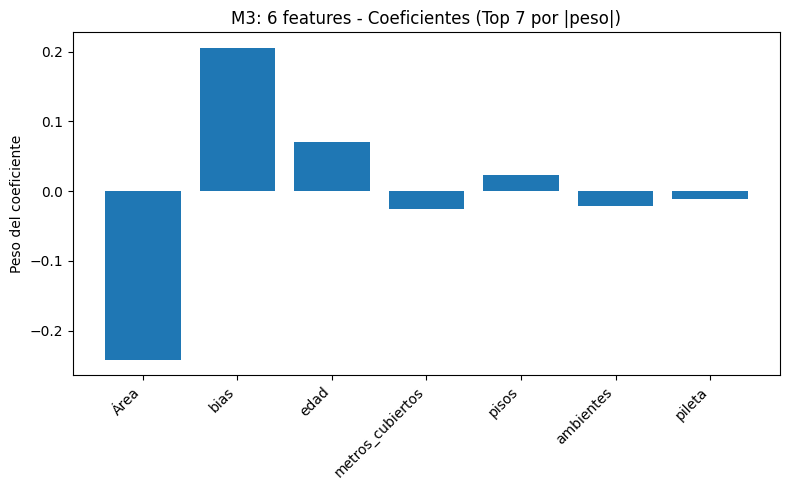

In [29]:
# M1 (univariado)
plot_model_diagnostics(M1, xM1_train, y1_train, xM1_val, y1_val,
                       model_name="Modelo M1(Área vs Precio)",
                       univariate_feature="Área",  # quitalo si no es 1D
                       top_k=20)

# M2 (multivariable)
plot_model_diagnostics(M2, xM2_train, y2_train, xM2_val, y2_val,
                       model_name="Modelo M2(Área y pileta vs Precio)",
                       univariate_feature=None,
                       top_k=20)

# M3 (muchas features)
plot_model_diagnostics(M3, xM3_train, y3_train, xM3_val, y3_val,
                       model_name="M3: 6 features",
                       univariate_feature=None,
                       top_k=25)   # subí/bajá según cuántas querés ver

In [30]:
lambdas = np.logspace(-4, 3, 30)

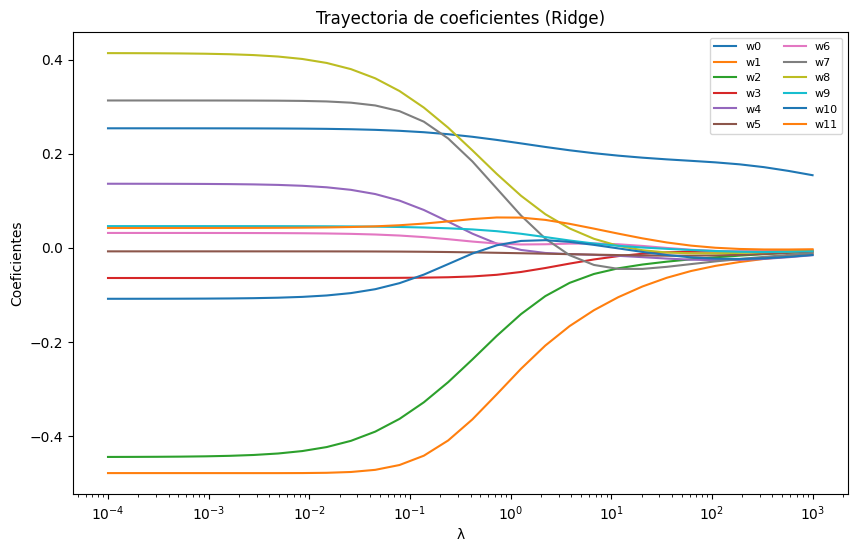

In [31]:
coefs_ridge = []
for i in lambdas:
    model = RegresionLineal(xM4_train, y4_train, bias=True).fit_ridge(l2 = i)
    coefs_ridge.append(model.coef)

coefs_ridge = np.vstack(coefs_ridge)

plt.figure(figsize=(10,6))
for j in range(coefs_ridge.shape[1]):
    plt.plot(lambdas, coefs_ridge[:, j], label=f"w{j}")
plt.xscale("log")
plt.xlabel("λ")
plt.ylabel("Coeficientes")
plt.title("Trayectoria de coeficientes (Ridge)")
plt.legend(ncol=2, fontsize=8)
plt.show()

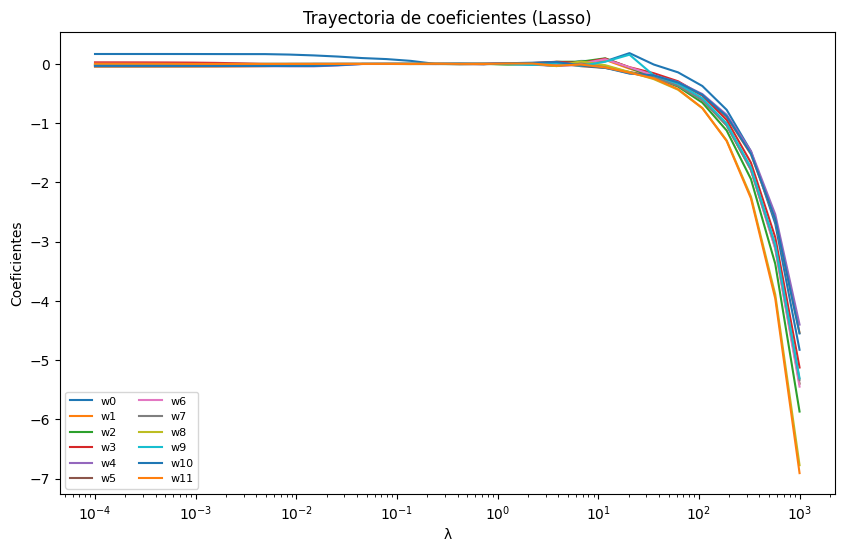

In [32]:
coefs_lasso = []
for i in lambdas:
    model = RegresionLineal(xM4_train, y4_train, bias=True).fit_lasso(l1 = i)
    coefs_lasso.append(model.coef)

coefs_lasso = np.vstack(coefs_lasso)

plt.figure(figsize=(10,6))
for j in range(coefs_lasso.shape[1]):
    plt.plot(lambdas, coefs_lasso[:, j], label=f"w{j}")
plt.xscale("log")
plt.xlabel("λ")
plt.ylabel("Coeficientes")
plt.title("Trayectoria de coeficientes (Lasso)")
plt.legend(ncol=2, fontsize=8)
plt.show()

Ridge:
- Amedida que crece el λ, los coeficientes tienden a 0. De esta forma se podria decir que Ridge distribuye la penalizacion entre las features.
- Las más importantes son las que tardan más en decaer cuando aumenta λ.
- Las menos importantes son las que decaen rápidamente cuando λ empieza a crecer.

Lasso:
- Esta bien el grafico de Lasso?

In [ ]:
def kfold_indices(n, k=5, shuffle=True, seed=42):
    rng = np.random.default_rng(seed)
    idx = np.arange(n)
    if shuffle: rng.shuffle(idx)
    folds = np.array_split(idx, k)
    return folds

def cv_mse_vs_lambda(X: pd.DataFrame, y: pd.Series, lambdas: np.ndarray, k=5, mode="ridge", lasso_epochs=3000, shuffle=True, seed=42):
    """
    Devuelve (mse_mean, mse_std) para cada λ evaluado con K-fold CV.
    Si rebalance_per_fold=True normaliza cada fold con stats del train fold.
    """
    X = X.copy()
    y = y.copy().astype(float).reset_index(drop=True)
    n = len(X)

    folds = kfold_indices(n, k=k, shuffle=shuffle, seed=seed)
    mse_means, mse_stds = [], []

    for lam in lambdas:
        fold_mse = []
        for vi in range(k):
            val_idx = folds[vi]
            train_idx = np.concatenate([folds[j] for j in range(k) if j != vi])

            X_tr, y_tr = X.iloc[train_idx], y.iloc[train_idx]
            X_va, y_va = X.iloc[val_idx],   y.iloc[val_idx]

            if mode == "ridge":
                m = RegresionLineal(X_tr, y_tr, bias=True).fit_ridge(lam)
            elif mode == "lasso":
                # Si implementaste ISTA/proximal:
                m = RegresionLineal(X_tr, y_tr, bias=True).fit_lasso(lam, epochs=lasso_epochs)
                # Si en tu clase tenés una variante con lr, usala:
                # m = RegresionLineal(X_tr, y_tr, bias=True).fit_lasso(lam, lr=lasso_lr or 0.01, epochs=lasso_epochs)
            else:
                raise ValueError("mode debe ser 'ridge' o 'lasso'")

            fold_mse.append(m.mse(X_va, y_va))

        fold_mse = np.array(fold_mse, dtype=float)
        mse_means.append(fold_mse.mean())
        mse_stds.append(fold_mse.std(ddof=1) if k > 1 else 0.0)

    return np.array(mse_means), np.array(mse_stds)

def plot_mse_curve(lambdas, mse_mean, mse_std=None, title="ECM vs λ"):
    plt.figure(figsize=(7,4))
    plt.semilogx(lambdas, mse_mean, marker="o")
    if mse_std is not None:
        plt.fill_between(lambdas, mse_mean - mse_std, mse_mean + mse_std, alpha=0.15)
    plt.xlabel("λ (penalización)")
    plt.ylabel("ECM (CV)")
    plt.title(title)
    plt.tight_layout()
    plt.show()
# --------- USO ----------
# X_m4, y_m4: las MISMAS features que usaste en M4 (antes de regularizar)
# OJO: no mezcles target 'precio' dentro de X.
# Si ya tenías todo normalizado afuera, podés pasar rebalance_per_fold=False
# pero lo correcto es True (normalizar dentro de cada fold).

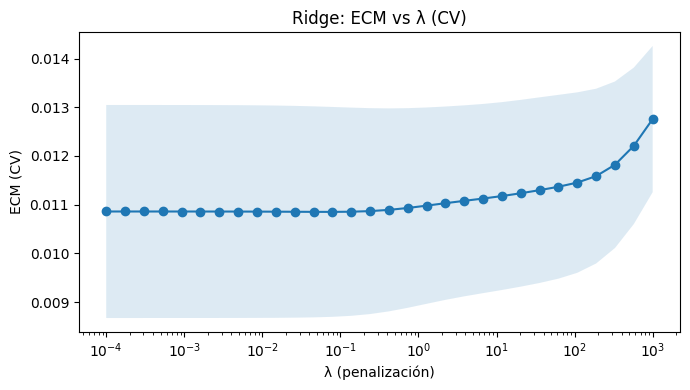

Mejor λ (Ridge): 0.07880462815669913 ECM(CV): 0.01085260463894514


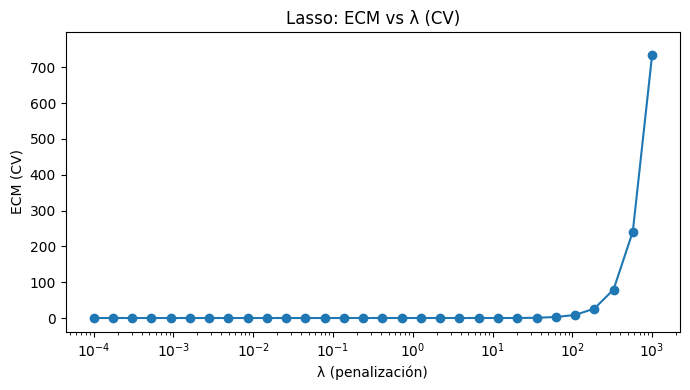

Mejor λ (Lasso): 0.0005298316906283707 ECM(CV): 0.011149494243108519


In [34]:
# Ridge
mse_r_mean, mse_r_std = cv_mse_vs_lambda(xM4_train, y4_train, lambdas, k=5, mode="ridge")
plot_mse_curve(lambdas, mse_r_mean, mse_r_std, title="Ridge: ECM vs λ (CV)")
best_lam_ridge = lambdas[np.argmin(mse_r_mean)]
print("Mejor λ (Ridge):", best_lam_ridge, "ECM(CV):", mse_r_mean.min())

# Lasso
mse_l_mean, mse_l_std = cv_mse_vs_lambda(xM4_train, y4_train, lambdas, k=5, mode="lasso", lasso_epochs=5000)
plot_mse_curve(lambdas, mse_l_mean, mse_l_std, title="Lasso: ECM vs λ (CV)")
best_lam_lasso = lambdas[np.argmin(mse_l_mean)]
print("Mejor λ (Lasso):", best_lam_lasso, "ECM(CV):", mse_l_mean.min())

# Entrenar el modelo final M6 (elegí el que rinda mejor o reportá ambos)
# Si querés reentrenar con TODO el conjunto de desarrollo (X_m4, y_m4):
# (podés normalizar X_m4 al final con las mismas reglas que venís usando)

M6_ridge = RegresionLineal(xM4_train, y4_train, bias=True).fit_ridge(best_lam_ridge)
M6_lasso = RegresionLineal(xM4_train, y4_train, bias=True).fit_lasso(best_lam_lasso, epochs=5000)

In [43]:
def plot_learning_curve(model_class, X_train, y_train, X_val, y_val, 
                        train_sizes=None, mode="ridge", lam=0):
    if train_sizes is None:
        train_sizes = np.linspace(0.1, 1.0, 10)

    train_errors, val_errors = [], []
    n = len(X_train)

    for frac in train_sizes:
        m = int(frac * n)

        Xtr, ytr = X_train.iloc[:m], y_train.iloc[:m]

        if mode == "ridge":
            model = model_class(Xtr, ytr, bias=True).fit_ridge(lam)
        elif mode == "lasso":
            model = model_class(Xtr, ytr, bias=True).fit_lasso(lam, epochs=5000)
        elif mode == "pinv":
            model = model_class(Xtr, ytr, bias=True).fit_pinv()
        else:
            model = model_class(Xtr, ytr, bias=True).fit_gd()

        train_errors.append(model.mse(Xtr, ytr))
        val_errors.append(model.mse(X_val, y_val))

    plt.plot(train_sizes, train_errors, "o-", label="Train error")
    plt.plot(train_sizes, val_errors, "o-", label="Validation error")
    plt.xlabel("Fracción de datos de entrenamiento")
    plt.ylabel("MSE")
    plt.title(f"Learning Curve ({mode}, λ={lam})")
    plt.legend()
    plt.show()

In [ ]:
plot_learning_curve(RegresionLineal, xM1_train, y1_train, xM4_val, y4_val, mode="ridge", lam=best_lam_ridge)
plot_learning_curve(RegresionLineal, xM4_train, y4_train, xM4_val, y4_val, mode="lasso", lam=best_lam_lasso)
plot_learning_curve(RegresionLineal, xM4_train, y4_train, xM4_val, y4_val, mode="pinv")
plot_learning_curve(RegresionLineal, xM4_train, y4_train, xM4_val, y4_val, mode="gd")

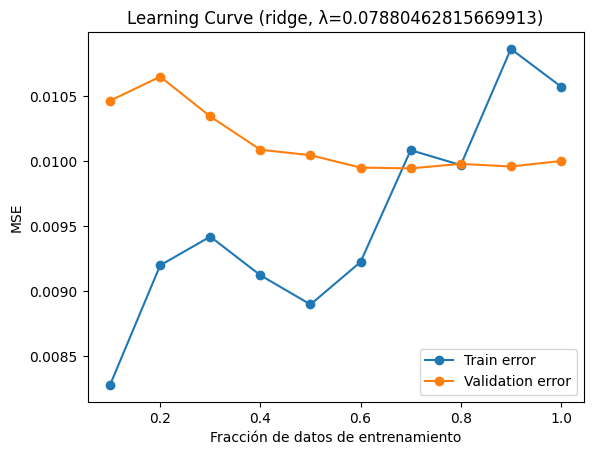

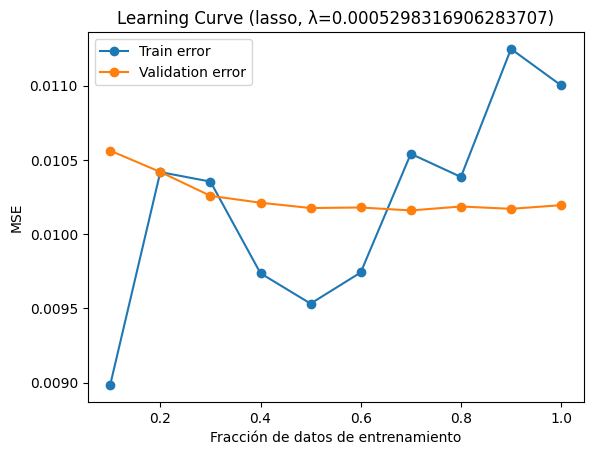

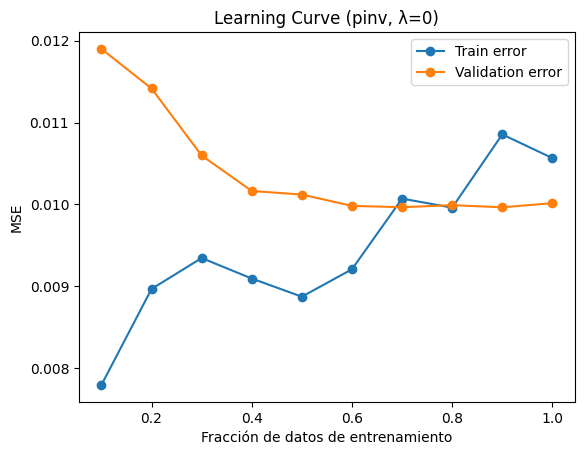

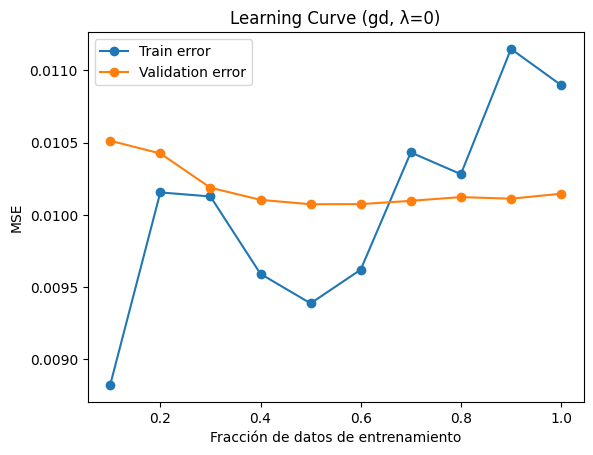

In [44]:
plot_learning_curve(RegresionLineal, xM4_train, y4_train, xM4_val, y4_val, mode="ridge", lam=best_lam_ridge)
plot_learning_curve(RegresionLineal, xM4_train, y4_train, xM4_val, y4_val, mode="lasso", lam=best_lam_lasso)
plot_learning_curve(RegresionLineal, xM4_train, y4_train, xM4_val, y4_val, mode="pinv")
plot_learning_curve(RegresionLineal, xM4_train, y4_train, xM4_val, y4_val, mode="gd")

In [ ]:
def mae_np(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)
    return float(np.mean(np.abs(y_true - y_pred)))

def rmse_np(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)
    return float(np.sqrt(np.mean((y_true - y_pred)**2)))

In [ ]:
def evaluate_final_model(model, X_test, y_test, min_vals, max_vals, target_col="precio"):
    # predicciones normalizadas
    y_pred_norm = model.predict(X_test)

    # volver a escala original
    y_pred = deNormalize(y_pred_norm, min_vals, max_vals, target_col)
    y_true = deNormalize(y_test,      min_vals, max_vals, target_col)

    # métricas en escala original
    mae  = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    r2   = 1.0 - np.sum((y_true - y_pred)**2) / np.sum((y_true - y_true.mean())**2)

    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.4f}")
    return mae, rmse, r2